# Capstone Project - Predicting Hosuing Prices in Moscow

<h3>Import of important libraries</h3>
<p>Those libraries are needed for further analyis</p> 

<p>Loading the datasets:</p>
    <ul><li><p>train.csv</p></li>
    <li><p>test.csv</p></li>
    <li><p>macro.csv</p></li></ul>

In [1]:
%pylab inline
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)

import pandas as pd 
import numpy as np

import xgboost as xgb

import missingno as msn

cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


In [2]:
#loading train dataset
with open("train.csv", 'r') as f:
    train_df = pd.read_csv(f)
#loading test dataset
with open("test.csv", 'r') as f:
    test_df = pd.read_csv(f)
    #loading macro dataset
with open("macro.csv", 'r') as f:
    macro_df = pd.read_csv(f)

# Part 1 - Prepocessing

### So before we go into in depth analysis of the data lets have a first quick at the data 

In [3]:
display(train_df.head())
display(test_df.head())
display(macro_df.head())

C:\Users\Wegee\Anaconda3\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\Wegee\Anaconda3\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [4]:
display(train_df.shape)
display(train_df.describe())
display(test_df.shape)
display(test_df.describe())
display(macro_df.shape)
display(macro_df.describe())

(30471, 292)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


(7662, 291)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
count,7662.000000,7662.000000,6486.000000,7662.000000,7662.000000,7662.000000,6613.000000,7662.000000,7662.000000,6968.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,34304.500000,53.701164,32.660037,7.652571,12.591099,1.854216,1820.888099,1.876403,6.938662,1.985792,...,69.532890,35.777865,12.152310,2.007439,16.749152,33.109371,0.412425,9.639650,56.235839,6.330723
std,2211.973214,20.104320,22.737855,5.099418,6.659291,1.517171,552.993964,0.835665,25.579688,0.820086,...,129.533773,76.524992,29.590097,5.664540,30.706709,49.734993,0.608938,21.499687,47.632547,4.956223
min,30474.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32389.250000,39.200000,19.900000,4.000000,9.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,...,7.000000,2.000000,1.000000,0.000000,3.000000,10.000000,0.000000,0.000000,12.000000,2.000000
50%,34304.500000,50.410000,30.400000,7.000000,14.000000,1.000000,1982.000000,2.000000,7.000000,2.000000,...,27.000000,10.000000,2.000000,0.000000,7.000000,17.000000,0.000000,2.000000,51.000000,5.000000
75%,36219.750000,63.300000,41.800000,11.000000,17.000000,2.000000,2011.000000,2.000000,9.500000,3.000000,...,54.000000,25.000000,5.000000,1.000000,13.000000,29.000000,1.000000,7.000000,79.000000,11.000000
max,38135.000000,403.000000,869.000000,41.000000,48.000000,6.000000,2019.000000,19.000000,1968.000000,4.000000,...,643.000000,374.000000,145.000000,29.000000,150.000000,249.000000,2.000000,105.000000,212.000000,21.000000


(2484, 100)

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


### A quick glance already tells us that there are a lot of missing values in the data. Further one can see that all three datasets have the common feature **timestamp**, which we can use to merge the dataframes.

<p>I will merge the test and train datasets with the macro dataset. Therefore I will merge those dataframes based on their timestamp:<p>
<img src="http://blog.codinghorror.com/content/images/uploads/2007/10/6a0120a85dcdae970b01287770273e970c-pi.png" width="200", align = "left", alt = "blog.codinghorror.com">
<p></p>
<p>Here **A** represents the train and test data while **B** is the macro data</p>

In [5]:
train_df.set_index(pd.to_datetime(train_df["timestamp"]), inplace = True)
test_df.set_index(pd.to_datetime(test_df["timestamp"]), inplace = True)
macro_df.set_index(pd.to_datetime(macro_df["timestamp"]), inplace = True)

In [6]:
train_merge = pd.merge(left = train_df, right = macro_df, how = "left", left_on = "timestamp", right_on = "timestamp")
test_merge = pd.merge(left = test_df, right = macro_df, how = "left", left_on = "timestamp", right_on = "timestamp")

### Ok now that we have merged the dataframes, lets look for missing values and the data's distribution
<p>I want to look at ***how many columns have missing values*** and what features have ***the most missing values***.

From 391 features, 93 having missing values. Thats 24% of them.


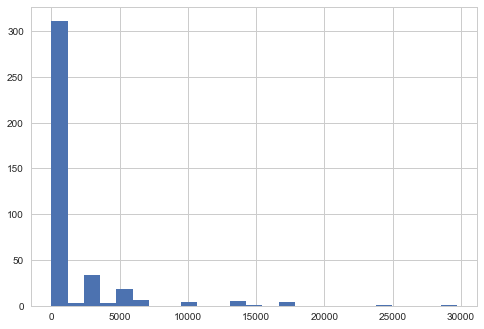

In [7]:
null_values = pd.DataFrame(sorted(train_merge.isnull().sum()))
plt.hist(null_values, bins=25);

no_train_features = train_merge.shape[1]
no_train_missing = train_merge.shape[1] - train_merge.dropna(axis=1).shape[1]

print("From {} features, {} having missing values. Thats {}% of them.".format(
        no_train_features, no_train_missing, round(no_train_missing/no_train_features*100),2))

<p>Looking at the histogram we can see that there are some features with show very high missing value counts. We should investigate this more.</p>
<p>We can look how much percent of the values are actually missing and what features are those.</p>

In [8]:
total = train_merge.isnull().sum().sort_values(ascending=False)
perc = (train_merge.isnull().sum()/train_merge.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, perc], axis=1, keys=['Total Missing', 'Percent'])
#print(missing_data["Percent"][missing_data["Percent"]>0][:25])
#plt.hist(missing_data["Percent"][missing_data["Percent"]>0], bins=25);

#grouping features based on missing values
mt50 = missing_data["Percent"][missing_data["Percent"]>0.5]
mt25 = missing_data["Percent"][(missing_data["Percent"]>0.25) & (missing_data["Percent"]<0.5)]
mt10 = missing_data["Percent"][(missing_data["Percent"]>0.1) & (missing_data["Percent"]<0.25)]
mt5 = missing_data["Percent"][(missing_data["Percent"]>0.05) & (missing_data["Percent"]<0.1)]
lt5 = missing_data["Percent"][missing_data["Percent"]<0.05] 

print("Features with more than 50% missing values: {}".format(len(mt50)))
print("Those are: ")
for i,ind in enumerate(mt50.index):
    print("{} with {}% missing.".format(ind, round(mt50[i]*100,2)))
print("\n")
print("Features with more than 25% missing values: {}".format(len(mt25)))
print("Those are: ")
for i,ind in enumerate(mt25.index):
    print("{} with {}% missing.".format(ind, round(mt25[i]*100,2)))
print("\n")
print("Features with more than 10% missing values: {}".format(len(mt10)))
for i,ind in enumerate(mt10.index):
    print("{} with {}% missing.".format(ind, round(mt10[i]*100,2)))
print("\n")
print("Features with more than 5% missing values: {}".format(len(mt5)))
print("Features with less than 5% missing values: {}".format(len(lt5)))

Features with more than 50% missing values: 6
Those are: 
provision_retail_space_modern_sqm with 97.53% missing.
provision_retail_space_sqm with 81.65% missing.
students_reg_sports_share with 55.47% missing.
museum_visitis_per_100_cap with 55.47% missing.
theaters_viewers_per_1000_cap with 55.47% missing.
load_of_teachers_preschool_per_teacher with 55.47% missing.


Features with more than 25% missing values: 10
Those are: 
hospital_beds_raion with 47.39% missing.
build_year with 44.65% missing.
state with 44.5% missing.
cafe_sum_500_max_price_avg with 43.59% missing.
cafe_sum_500_min_price_avg with 43.59% missing.
cafe_avg_price_500 with 43.59% missing.
material with 31.41% missing.
kitch_sq with 31.41% missing.
num_room with 31.41% missing.
max_floor with 31.41% missing.


Features with more than 10% missing values: 61
preschool_quota with 21.95% missing.
school_quota with 21.94% missing.
cafe_avg_price_1000 with 21.41% missing.
cafe_sum_1000_max_price_avg with 21.41% missing.
cafe_s

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


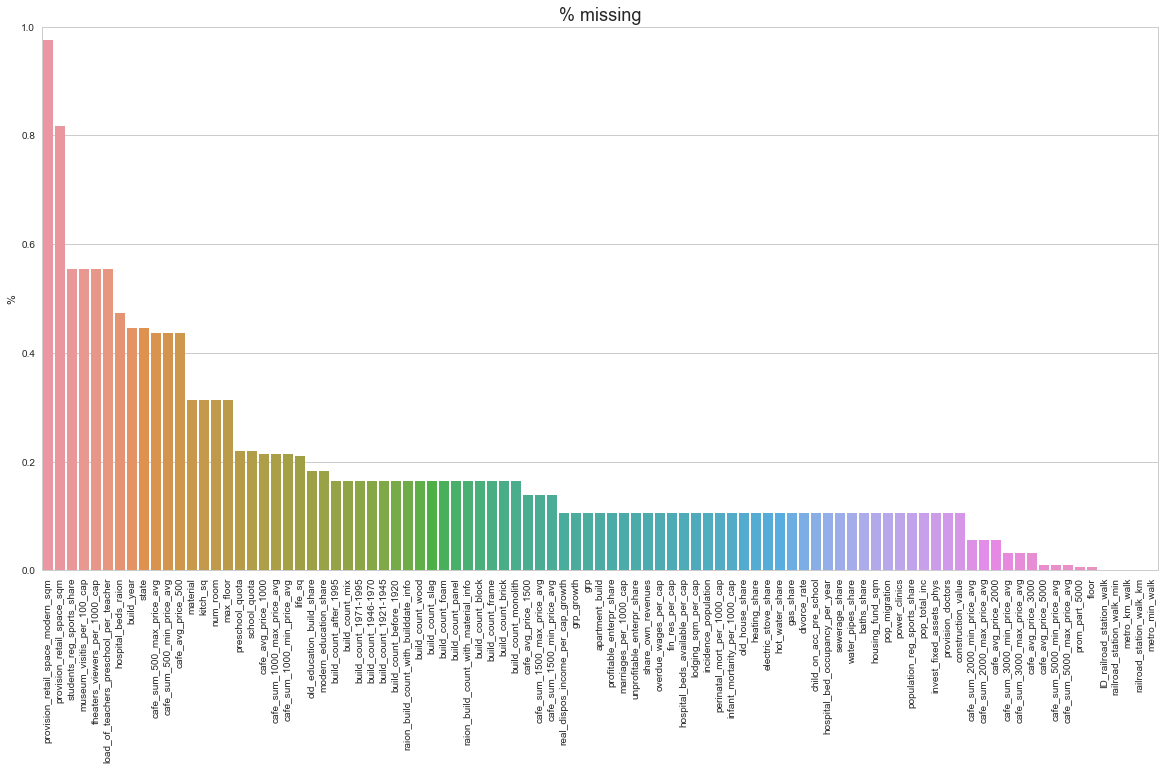

In [9]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=perc[perc > 0].index, y=perc[perc > 0]);
plt.title("% missing", fontsize=18)
plt.ylabel("%")
plt.ylim(0,1);

<p>Ok, lets quickly look at the test.csv and if more or less the same features show high missing value counts</p>

From 391 features, 114 having missing values. Thats 29% of them.


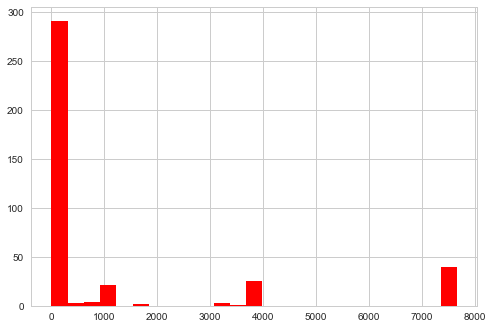

In [10]:
null_values = pd.DataFrame(sorted(test_merge.isnull().sum()))
plt.hist(null_values, bins=25, color="red");

no_test_features = train_merge.shape[1]
no_test_missing = train_merge.shape[1] - test_merge.dropna(axis=1).shape[1]

print("From {} features, {} having missing values. Thats {}% of them.".format(
        no_test_features, no_test_missing, round(no_test_missing/no_test_features*100),2))

In [11]:
test_total = test_merge.isnull().sum().sort_values(ascending=False)
test_perc = (test_merge.isnull().sum()/test_merge.isnull().count()).sort_values(ascending=False)
missing_tdata = pd.concat([test_total, test_perc], axis=1, keys=['Total Missing', 'Percent'])
#print(missing_data["Percent"][missing_data["Percent"]>0][:25])
#plt.hist(missing_data["Percent"][missing_data["Percent"]>0], bins=25);

#grouping features based on missing values
tmt50 = missing_tdata["Percent"][missing_tdata["Percent"]>0.5]
tmt25 = missing_tdata["Percent"][(missing_tdata["Percent"]>0.25) & (missing_tdata["Percent"]<0.5)]
tmt10 = missing_tdata["Percent"][(missing_tdata["Percent"]>0.1) & (missing_tdata["Percent"]<0.25)]
tmt5 = missing_tdata["Percent"][(missing_tdata["Percent"]>0.05) & (missing_tdata["Percent"]<0.1)]
tlt5 = missing_tdata["Percent"][missing_tdata["Percent"]<0.05]
missing_tdata
print("Features with more than 50% missing values: {}".format(len(tmt50)))
print("Those are: ")
for i,ind in enumerate(tmt50.index):
    print("{} with {}% missing.".format(ind, round(tmt50[i]*100,2)))
print("\n")
print("Features with more than 25% missing values: {}".format(len(tmt25)))
print("Those are: ")
for i,ind in enumerate(tmt25.index):
    print("{} with {}% missing.".format(ind, round(tmt25[i]*100,2)))
print("\n")
print("Features with more than 10% missing values: {}".format(len(tmt10)))
for i,ind in enumerate(tmt10.index):
    print("{} with {}% missing.".format(ind, round(tmt10[i]*100,2)))
print("\n")
print("Features with more than 5% missing values: {}".format(len(tmt5)))
print("Features with less than 5% missing values: {}".format(len(tlt5)))

Features with more than 50% missing values: 65
Those are: 
unprofitable_enterpr_share with 100.0% missing.
sewerage_share with 100.0% missing.
incidence_population with 100.0% missing.
perinatal_mort_per_1000_cap with 100.0% missing.
infant_mortarity_per_1000_cap with 100.0% missing.
share_own_revenues with 100.0% missing.
old_house_share with 100.0% missing.
heating_share with 100.0% missing.
electric_stove_share with 100.0% missing.
hot_water_share with 100.0% missing.
gas_share with 100.0% missing.
baths_share with 100.0% missing.
divorce_rate with 100.0% missing.
water_pipes_share with 100.0% missing.
lodging_sqm_per_cap with 100.0% missing.
housing_fund_sqm with 100.0% missing.
overdue_wages_per_cap with 100.0% missing.
fin_res_per_cap with 100.0% missing.
pop_total_inc with 100.0% missing.
pop_migration with 100.0% missing.
marriages_per_1000_cap with 100.0% missing.
invest_fixed_assets_phys with 100.0% missing.
profitable_enterpr_share with 100.0% missing.
construction_value wit

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


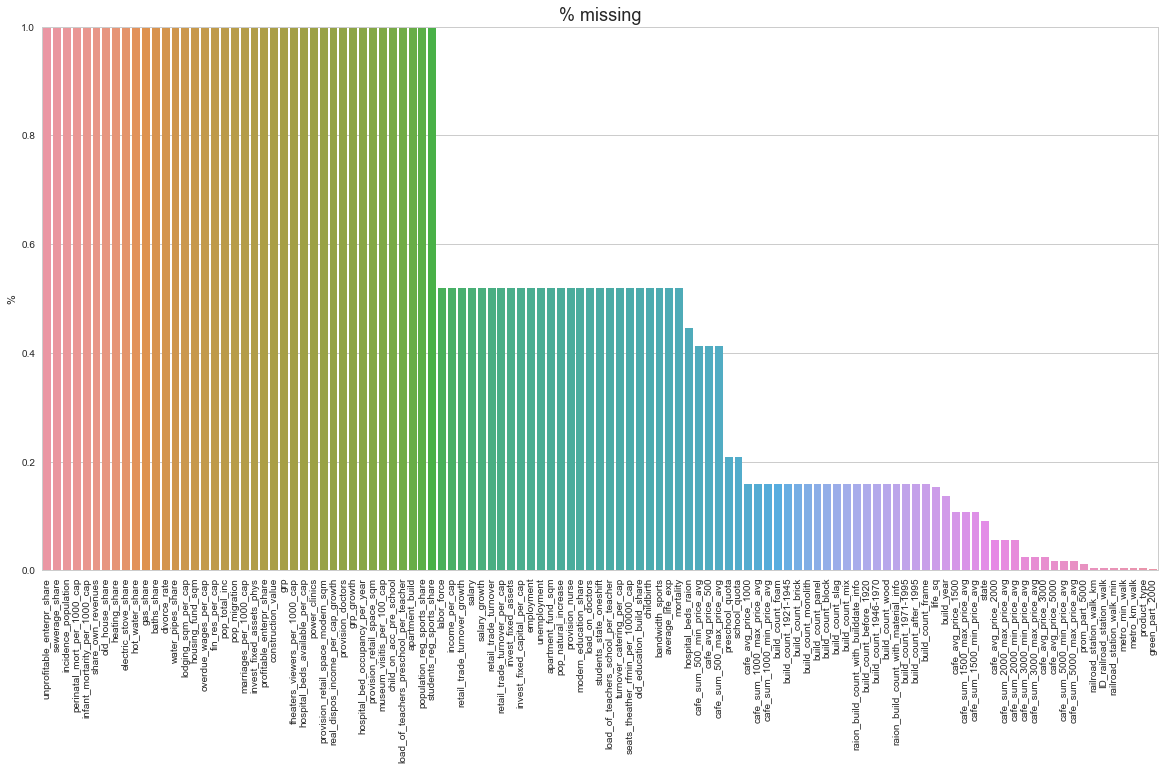

In [12]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=test_perc[test_perc > 0].index, y=test_perc[test_perc > 0]);
plt.title("% missing", fontsize=18)
plt.ylabel("%")
plt.ylim(0,1);

<p>So there are some features with a lot of missing values, which are probably important for the house price.</p>
<p>When we look at the features we have basically 3 types of features:</p>
<ul>
    <li><p>Features of the house itself (e.g. *num_room*).</P></li>
    <li><p>Features of the neighbourhood (e.g. *oil_chemistry_*).</P></li>
    <li><p>Features of Russia's economy (e.g. *gdp_annual*).</P></li>
</ul>
<p>Features of the house itself are probably most important for price predictions, therefore I will carefully look at those. Those features are:</p>
<ul>
    <li><p>**price_doc**: This is our target variable, the housing price in rubel.</P></li>
    <li><p>**id**: This is the id of the house. This is not important and we can drop it.</P></li>
    <li><p>**full_sq**: This are the total m² of the house.</P></li>
    <li><p>**life_sq**: This are the living room m².</P></li>
    <li><p>**floor**: This is only for apartments and shows the floor on which the apartment is.</P></li>
    <li><p>**max_floor**: The max floor of the building the apartment is in.</P></li>
    <li><p>**material**: The material of the walls:
    <ol>
        <li><p>panel</p></li>
        <li><p>brick</p></li>
        <li><p>wood</p></li>
        <li><p>mass concrete</p></li>
        <li><p>breezeblock</p></li>
        <li><p>mass concrete plus brick</p></li>
    </ol><p></p>
    <li><p>**build_year**: The year in which the house was (will be) build. (*This can also be in the future*)</P></li>
    <li><p>**kitch_sq**: This are the kitchen m².</P></li>
    <li><p>**num_room**: number of living rooms</P></li>
    <li><p>**state**: The state in which the house is (4 best, 1 worst).</P></li>
    <li><p>**product_type**: owner-occupier purchase or investment.</P></li>
    <li><p>**sub_area**: name of the district.</P></li>
</ul>
<p>Let's have a closer look at those. So we have continous numeric features:</p>
<ul><li><p>price_doc, full_sq, life_sq, kitch_sq</p></li></ul>
<p>some discrete numeric features:</p>
<ul><li><p>floor, max_floor, build_year, num_room</p></li></ul>
<p>and some categorical</p>
<ul><li><p>material, product_type, sub_area and state</p></li></ul>

<p>Lets explore them</p>

### Continous Feature Cleaning

In [13]:
cont_train = train_merge[["price_doc","full_sq", "life_sq","kitch_sq"]]
cont_test = test_merge[["full_sq", "life_sq","kitch_sq"]]

disc_train = train_merge[["floor", "max_floor", "build_year", "num_room"]]
disc_test = test_merge[["floor", "max_floor", "build_year", "num_room"]]

cat_train = train_merge[["material", "state", "product_type", "sub_area"]]
cat_test = test_merge[["material", "state", "product_type", "sub_area"]]

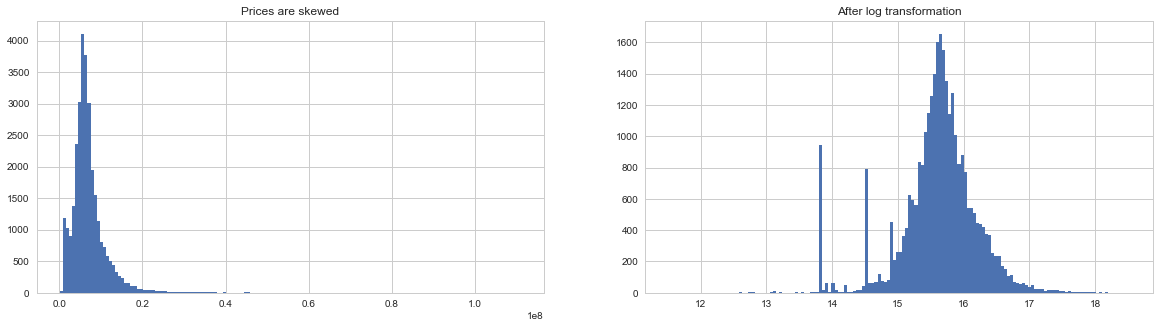

In [14]:
fig = plt.figure(figsize(20,5))
plt.subplot(121)
plt.title("Prices are skewed")
plt.hist(cont_train["price_doc"],bins = 150);
plt.subplot(122)
plt.title("After log transformation")
plt.hist(np.log1p(cont_train["price_doc"]),bins = 150);

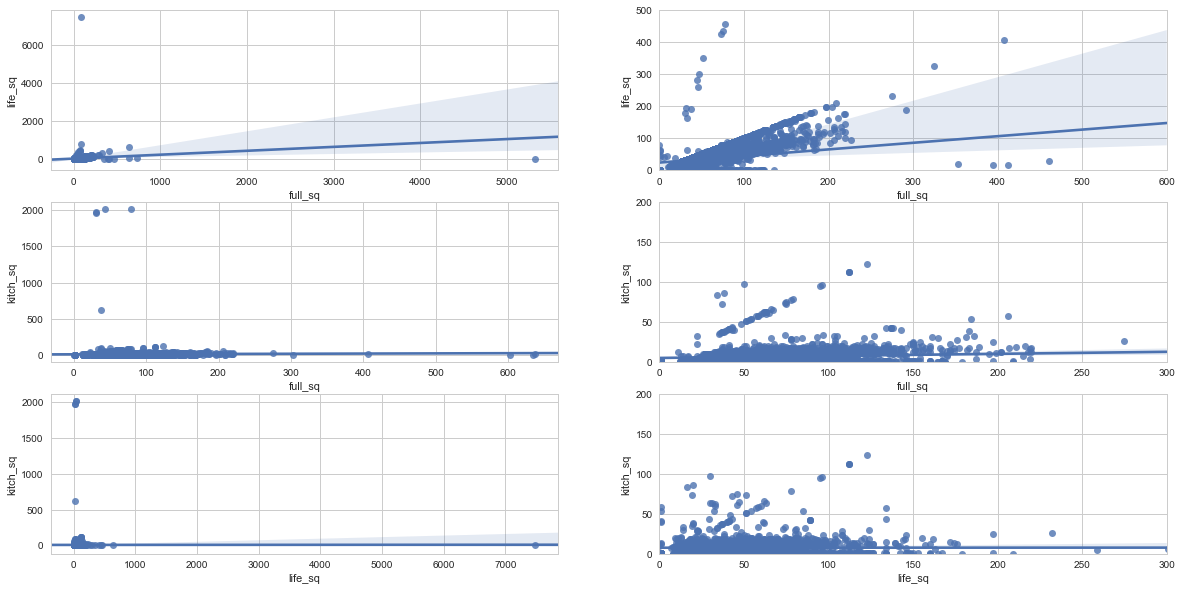

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(cont_train["full_sq"], cont_train["life_sq"])
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(cont_train["full_sq"], cont_train["life_sq"])
plt.subplot(323)
sns.regplot(cont_train["full_sq"], cont_train["kitch_sq"])
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(cont_train["full_sq"], cont_train["kitch_sq"])
plt.subplot(325)
sns.regplot(cont_train["life_sq"], cont_train["kitch_sq"])
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(cont_train["life_sq"], cont_train["kitch_sq"])

<p>A quick plot reveals some severe outliers, which we would like to reove.</p>
<p>When we look at the plots we can observe the following:</p>
<ol>
    <li><p>For some values ***life_sq > full_sq***.</p></li>
    <li><p>For some values ***kitch_sq > full_sq***.</p></li>
    <li><p>All three features show some outliers.</p></li>
    <li><p>The ratio of ***full_sq : life_sq*** seems to be terribly off for some cases.</p></li>
</ol>
<p>When we look at the features full_sq, life_sq and kitch_sq we can set up following rules: </p>
<ol>
    <li><p>full_sq >= life_sq > kitch_sq</p></li>
    <li><p>full_sq > 5 & life_sq > 5</p></li>
    <li><p>full_sq < 500</p></li>
    <li><p>life_sq < 500</p></li>
    <li><p>(kitch_sq >= 1 & full_sq < 15) or kitch_sq > 1</p></li>
    <li><p>life_sq/full_sq < 0.4</p></li>
</ol>
<p>I chose a cutoff of 5 m² since there are micro appartments with comparable sizes.</p>
<p>We will look at violation in detail and decide what to do.</p>


In [16]:
nonsense_fullsq = []
fullsq_too_big = []
kitchen_too_big = []
kitchen_too_small = []
life_too_big = []
no_life = []
fullsq_lifesq_ratio = []
test = []
meters = cont_train.drop("price_doc", axis=1)
meters.isnull().sum()
for i in range(len(meters)): 
    if meters.iloc[i]["full_sq"] < 5:
        nonsense_fullsq.append(i)
    if meters.iloc[i]["full_sq"] >500:
        fullsq_too_big.append(i)
    if meters.iloc[i]["life_sq"] > meters.iloc[i]["full_sq"] or\
    meters.iloc[i]["life_sq"] > 500: 
        life_too_big.append(i)
    if meters.iloc[i]["life_sq"] < 5:
        no_life.append(i)
    if meters.iloc[i]["kitch_sq"] >= meters.iloc[i]["full_sq"] or\
    (meters.iloc[i]["kitch_sq"] >= meters.iloc[i]["life_sq"] and meters.iloc[i]["life_sq"] > 5):
        kitchen_too_big.append(i)
    if (meters.iloc[i]["kitch_sq"] <= 1 and meters.iloc[i]["full_sq"] <= 15) or\
    meters.iloc[i]["kitch_sq"] < 2:
        kitchen_too_small.append(i)
    if meters.iloc[i]["full_sq"] > 0 and meters.iloc[i]["life_sq"] > 0:
        if meters.iloc[i]["life_sq"]/meters.iloc[i]["full_sq"] < 0.4:
            fullsq_lifesq_ratio.append(i)    

In [17]:
#deal with full_sq < 5 cases
for i in nonsense_fullsq:
    #if life_sq is a reasonable size it will replace full sq while being kept
    if meters.loc[i, "life_sq"] > 20:
        train_merge.loc[i, "full_sq"] = train_merge.loc[i, "life_sq"]
    #if kitch_sq is a reasonable size it will replace full sq while being dismissed    
    elif meters.loc[i, "kitch_sq"] > 20:
        train_merge.loc[i, "full_sq"] = train_merge.loc[i, "kitch_sq"]
        train_merge.loc[i, "kitch_sq"] = np.NaN

#deal with full_sq > 500 cases
for i in fullsq_too_big:
    train_merge.loc[i, "full_sq"] = np.NaN
            
#deal with kitchen too big cases
#ok looking through the values we can observe that there are some entries really large
#for instance row 10,368 got 2013. This is obviously an error 2013 looks much more like a building year
#So if the building year is a reasonable year set kitchen to NaN, otherwise replace building year before setting 
#kitchen to NaN
for i in kitchen_too_big:
    if meters.loc[i, "kitch_sq"] > 1900:
        if train_merge.loc[i, "build_year"] > 1900:
            train_merge.loc[i, "kitch_sq"] = np.NaN
        else: 
            train_merge.loc[i, "build_year"] = train_merge.loc[i, "kitch_sq"]
            train_merge.loc[i, "kitch_sq"] = np.NaN
    #in case the kitchen is as large or larger than full sq we will set the kitchen to NaN
    else:
        train_merge.loc[i, "kitch_sq"] = np.NaN

#deal with kitchen too small cases
#so when we have a very small flat it might be reasonable to assume that a kitchenlette is about 1 m² otherwise 
#a kitchen should be larger than 1 m². If this is not the case all values will be set to NaN
for i in kitchen_too_small:
    train_merge.loc[i, "kitch_sq"] = np.NaN
   
#no_life cases
#just set life to NaN
for i in no_life:
    train_merge.loc[i, "life_sq"] = np.NaN
#life too big cases
#ok so if the life is just a little bit larger than full sq (+ 10 m²) we will swap both variables
#otherwise lets set them to NaN for now
for i in life_too_big:
    if train_merge.loc[i, "full_sq"] > train_merge.loc[i, "life_sq"]:
        pass
    elif (train_merge.loc[i, "full_sq"] + 10) > train_merge.loc[i, "life_sq"]:
        train_merge.loc[i, "full_sq"], train_merge.loc[i, "life_sq"] = \
        train_merge.loc[i, "life_sq"], train_merge.loc[i, "full_sq"]
    else:
        train_merge.loc[i, "life_sq"] = np.NaN

#bad ratio
#lets for now just set life_sq to NaN
for i in fullsq_lifesq_ratio:
    train_merge.loc[i, "life_sq"] = np.NaN

<p>Ok so this should do it for the continous numeric features. However, before we move on lets visualize these again in order to see if the plots are looking better.</p>

,full_sq,life_sq,kitch_sq
count,30465.000000,23319.00000,14580.000000
mean,53.954341,34.74956,7.998903
std,21.814535,18.55572,2.768053
min,0.000000,8.00000,2.000000
25%,38.000000,20.00000,6.000000
50%,49.000000,30.00000,8.000000
75%,63.000000,43.00000,10.000000
max,461.000000,407.00000,57.000000


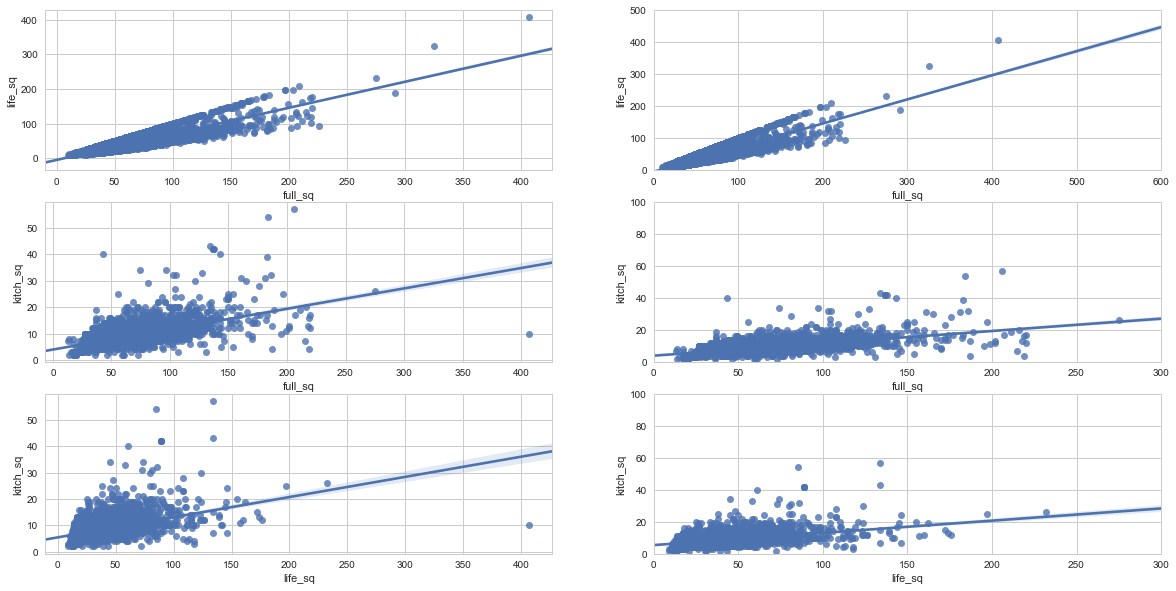

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(train_merge["full_sq"], train_merge["life_sq"]);
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(train_merge["full_sq"], train_merge["life_sq"]);
plt.subplot(323)
sns.regplot(train_merge["full_sq"], train_merge["kitch_sq"]);
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(train_merge["full_sq"], train_merge["kitch_sq"]);
plt.subplot(325)
sns.regplot(train_merge["life_sq"], train_merge["kitch_sq"]);
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(train_merge["life_sq"], train_merge["kitch_sq"]);

display(train_merge[["full_sq", "life_sq", "kitch_sq"]].describe());

### Discrete Feature Cleaning
<p>So after we dealt with the continous numeric features lets have a look at the discrete features.n Again lets start with some basic exploration and visualization.</p>

In [19]:
disc_train.describe()

,floor,max_floor,build_year,num_room
count,30304.000000,20899.000000,1.686600e+04,20899.000000
mean,7.670803,12.558974,3.068057e+03,1.909804
std,5.319989,6.756550,1.543878e+05,0.851805
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,9.000000,1.967000e+03,1.000000
50%,6.500000,12.000000,1.979000e+03,2.000000
75%,11.000000,17.000000,2.005000e+03,2.000000
max,77.000000,117.000000,2.005201e+07,19.000000


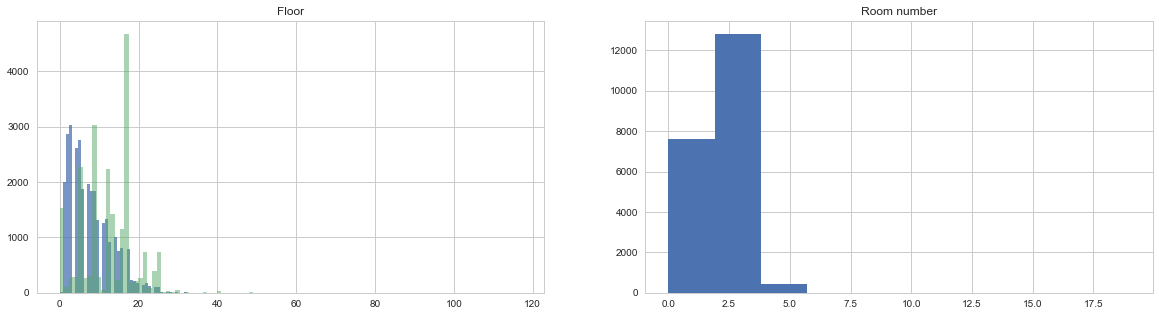

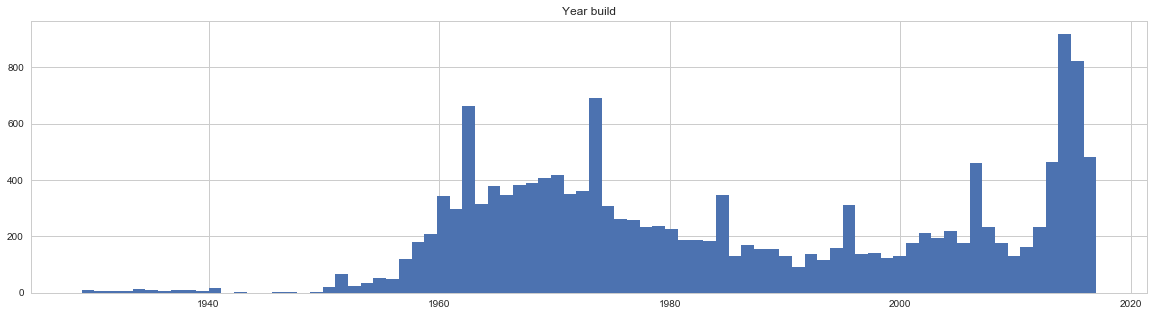

In [20]:
plt.figure()
plt.subplot(121)
plt.title("Floor")
plt.hist(disc_train["floor"].dropna(), bins=100, alpha = 0.75);
plt.hist(disc_train["max_floor"].dropna(), bins=100, alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(disc_train["num_room"].dropna(), bins=10);
plt.figure()
plt.title("Year build")
plt.hist(sorted(disc_train["build_year"].dropna())[1000:-50], bins=80);

### Cleaning the discrete values
<p>Ok so there are some things to do:</p>
<ul><li><p>**Floors**</p>
        <ol>
            <li><p>The Oko1 tower is Moscow's highest skyscraper with 85 floors.
            This is the max value for floor and max_floor.</p></li>
            <li><p>The floor must not be larger than the max_floor value.</p>
            *After lookig at the values in detail it seems not likely that values were just swapped.*</li>
        </ol>
    </li><p></p>
    <li><p>**num_room**</p>
        <ol>
            <li><p>The room number should be larger than 0.</p></li>
            <li><p>We can also compare the room_num with life_sq. The average room size shouldn't be smaller than 4 m².</p></li>
        </ol>
    </li><p></p>
    <li><p>**build_year**</p>
        <ol>
            <li><p>There are two outlier which will be manually corrected.</p></li>
            <li><p>Values smaller than 1900 will be replaced with NaN.</p></li>
        </ol>
    </li>
</ul>

In [21]:
too_high = []
floors_swapped = []

too_old = []
too_young = []

no_rooms = []
too_small = []

for i in range(len(disc_train)):
    if disc_train.loc[i, "floor"] > 85:
        too_high.append(i)
    if disc_train.loc[i, "max_floor"] > 85:
        too_high.append(i)
    if disc_train.loc[i, "max_floor"] < disc_train.loc[i, "floor"]:
        floors_swapped.append(i)
    
    if disc_train.loc[i, "build_year"] < 1500:
        too_young.append(i)
    if disc_train.loc[i, "build_year"] > 2020:
        too_old.append(i)
        
    if disc_train.loc[i, "num_room"] == 0:
        no_rooms.append(i)
    if train_merge.loc[i, "life_sq"] > 0 and disc_train.loc[i, "num_room"] > 0:    
        if train_merge.loc[i, "life_sq"]/disc_train.loc[i, "num_room"] < 4:
            too_small.append(i)

In [22]:
train_merge.loc[too_high, ["max_floor"]] = np.NaN
train_merge.loc[floors_swapped, ["max_floor"]] = np.NaN

#I will replace the values manually but otherwise one should replace them with NaN
#train_merge.loc[too_old, ["build_year"]] = np.NaN
train_merge.loc[10089, "build_year"] = 2007
train_merge.loc[15220, "build_year"] = 1965
train_merge.loc[too_young, ["build_year"]] = np.NaN

train_merge.loc[no_rooms, ["num_room"]] = np.NaN
train_merge.loc[too_small, ["num_room"]] = np.NaN

,floor,max_floor,build_year,num_room
count,30304.000000,19402.000000,15964.000000,20881.000000
mean,7.670803,13.439491,1985.350727,1.908769
std,5.319989,5.995632,20.995743,0.832218
min,0.000000,0.000000,1691.000000,1.000000
25%,3.000000,9.000000,1968.000000,1.000000
50%,6.500000,14.000000,1981.000000,2.000000
75%,11.000000,17.000000,2006.000000,2.000000
max,77.000000,57.000000,2018.000000,9.000000


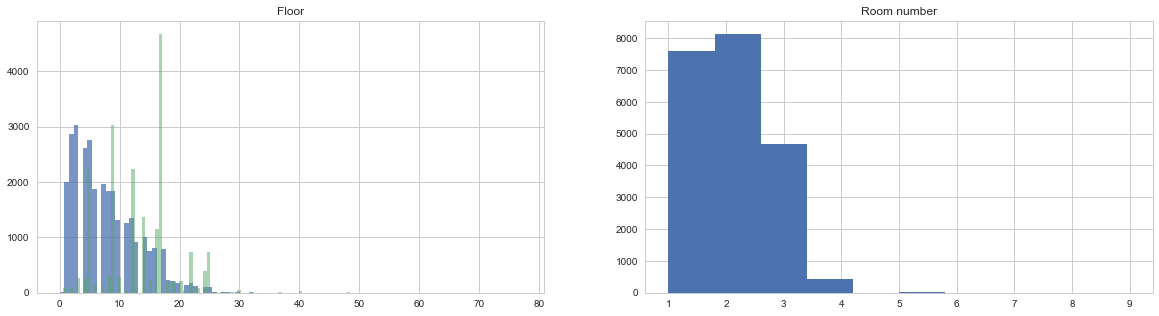

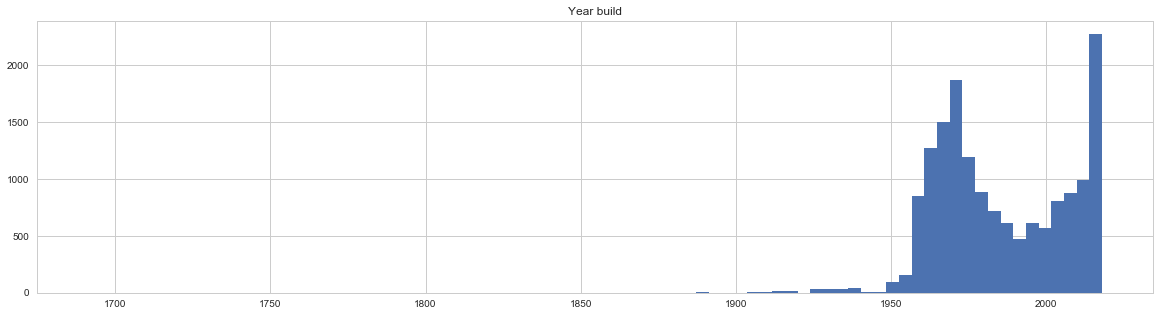

In [23]:
display(train_merge[["floor", "max_floor", "build_year", "num_room"]].describe())

plt.figure()
plt.subplot(121)
plt.title("Floor")
plt.hist(train_merge["floor"].dropna(), bins=100, alpha = 0.75);
plt.hist(train_merge["max_floor"].dropna(), bins=100, alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(train_merge["num_room"].dropna(), bins=10);
plt.figure()
plt.title("Year build")

plt.hist(sorted(train_merge["build_year"].dropna()), bins=80);

 ### Categorical Feature Cleaning
 <p>So we have 4 categorical features that might need some cleaning. We know that there are 6 material types, 4 state types and 2 product types.</p>

In [24]:
for i in ["material", "state", "product_type"]:
    display(cat_train[i].value_counts())

1.0    14197
2.0     2993
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: material, dtype: int64

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [25]:
x = (cat_train["state"][cat_train["state"] == 33].index[0])
train_merge.loc[x, ["state"]] = 3

# Test data
### Ok lets quickly do the same things to the test data set

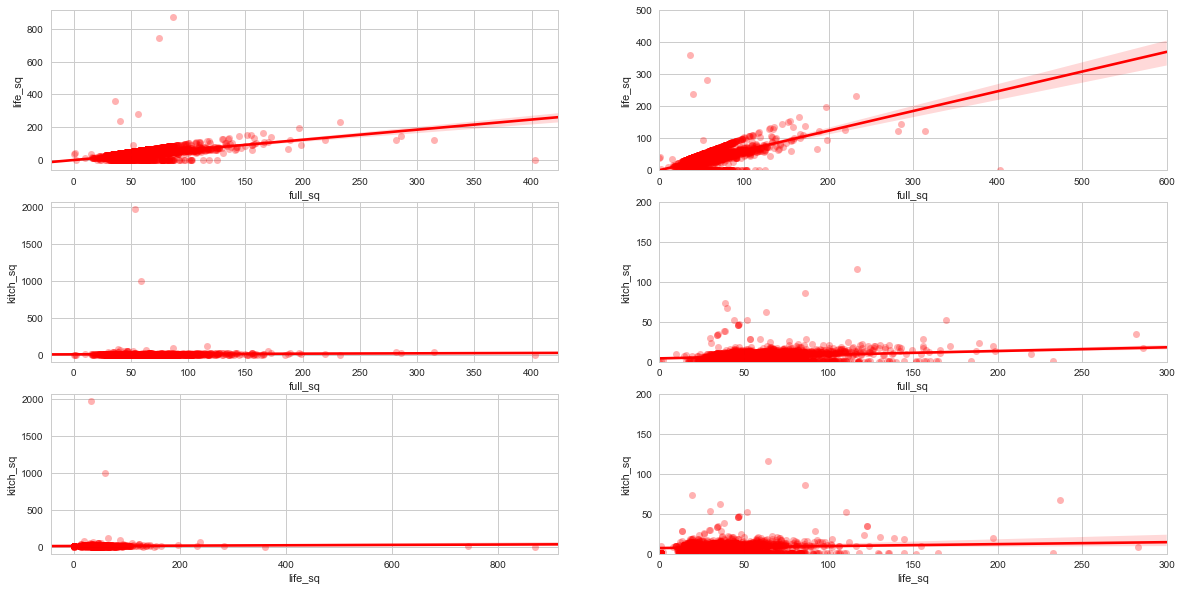

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(cont_test["full_sq"], cont_test["life_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(cont_test["full_sq"], cont_test["life_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(323)
sns.regplot(cont_test["full_sq"], cont_test["kitch_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(cont_test["full_sq"], cont_test["kitch_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(325)
sns.regplot(cont_test["life_sq"], cont_test["kitch_sq"], color = "red", scatter_kws={'alpha':0.3})
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(cont_test["life_sq"], cont_test["kitch_sq"], color = "red", scatter_kws={'alpha':0.3})

In [27]:
test_nonsense_fullsq = []
test_fullsq_too_big = []
test_kitchen_too_big = []
test_kitchen_too_small = []
test_life_too_big = []
test_no_life = []
test_fullsq_lifesq_ratio = []

for i in range(len(cont_test)): 
    if cont_test.iloc[i]["full_sq"] < 5:
        test_nonsense_fullsq.append(i)
    if cont_test.iloc[i]["full_sq"] >500:
        test_fullsq_too_big.append(i)
    if cont_test.iloc[i]["life_sq"] > cont_test.iloc[i]["full_sq"] or\
    cont_test.iloc[i]["life_sq"] > 500: 
        test_life_too_big.append(i)
    if cont_test.iloc[i]["life_sq"] < 5:
        test_no_life.append(i)
    if cont_test.iloc[i]["kitch_sq"] >= cont_test.iloc[i]["full_sq"] or\
    (cont_test.iloc[i]["kitch_sq"] >= cont_test.iloc[i]["life_sq"] and cont_test.iloc[i]["life_sq"] > 5):
        test_kitchen_too_big.append(i)
    if (cont_test.iloc[i]["kitch_sq"] <= 1 and cont_test.iloc[i]["full_sq"] <= 15) or\
    cont_test.iloc[i]["kitch_sq"] < 2:
        test_kitchen_too_small.append(i)
    if cont_test.iloc[i]["full_sq"] > 0 and cont_test.iloc[i]["life_sq"] > 0:
        if cont_test.iloc[i]["life_sq"]/cont_test.iloc[i]["full_sq"] < 0.4:
            test_fullsq_lifesq_ratio.append(i)    

In [28]:
#deal with full_sq < 5 cases
for i in test_nonsense_fullsq:
    #if life_sq is a reasonable size it will replace full sq while being kept
    if cont_test.loc[i, "life_sq"] > 20:
        test_merge.loc[i, "full_sq"] = test_merge.loc[i, "life_sq"]
    #if kitch_sq is a reasonable size it will replace full sq while being dismissed    
    elif cont_test.loc[i, "kitch_sq"] > 20:
        test_merge.loc[i, "full_sq"] = test_merge.loc[i, "kitch_sq"]
        test_merge.loc[i, "kitch_sq"] = np.NaN

#deal with full_sq > 500 cases
for i in test_fullsq_too_big:
    test_merge.loc[i, "full_sq"] = np.NaN
            
#deal with kitchen too big cases
#ok looking through the values we can observe that there are some entries really large
#for instance row 10,368 got 2013. This is obviously an error 2013 looks much more like a building year
#So if the building year is a reasonable year set kitchen to NaN, otherwise replace building year before setting 
#kitchen to NaN
for i in test_kitchen_too_big:
    if cont_test.loc[i, "kitch_sq"] > 1900:
        if test_merge.loc[i, "build_year"] > 1900:
            test_merge.loc[i, "kitch_sq"] = np.NaN
        else: 
            test_merge.loc[i, "build_year"] = test_merge.loc[i, "kitch_sq"]
            test_merge.loc[i, "kitch_sq"] = np.NaN
    #in case the kitchen is as large or larger than full sq we will set the kitchen to NaN
    else:
        test_merge.loc[i, "kitch_sq"] = np.NaN

#deal with kitchen too small cases
#so when we have a very small flat it might be reasonable to assume that a kitchenlette is about 1 m² otherwise 
#a kitchen should be larger than 1 m². If this is not the case all values will be set to NaN
for i in test_kitchen_too_small:
    test_merge.loc[i, "kitch_sq"] = np.NaN
   
#no_life cases
#just set life to NaN
for i in test_no_life:
    test_merge.loc[i, "life_sq"] = np.NaN
#life too big cases
#ok so if the life is just a little bit larger than full sq (+ 10 m²) we will swap both variables
#otherwise lets set them to NaN for now
for i in test_life_too_big:
    if test_merge.loc[i, "full_sq"] > test_merge.loc[i, "life_sq"]:
        pass
    elif (test_merge.loc[i, "full_sq"] + 10) > test_merge.loc[i, "life_sq"]:
        test_merge.loc[i, "full_sq"], test_merge.loc[i, "life_sq"] = \
        test_merge.loc[i, "life_sq"], test_merge.loc[i, "full_sq"]
    else:
        test_merge.loc[i, "life_sq"] = np.NaN

#bad ratio
#lets for now just set life_sq to NaN
for i in test_fullsq_lifesq_ratio:
    test_merge.loc[i, "life_sq"] = np.NaN

,full_sq,life_sq,kitch_sq
count,30465.000000,23319.00000,14580.000000
mean,53.954341,34.74956,7.998903
std,21.814535,18.55572,2.768053
min,0.000000,8.00000,2.000000
25%,38.000000,20.00000,6.000000
50%,49.000000,30.00000,8.000000
75%,63.000000,43.00000,10.000000
max,461.000000,407.00000,57.000000


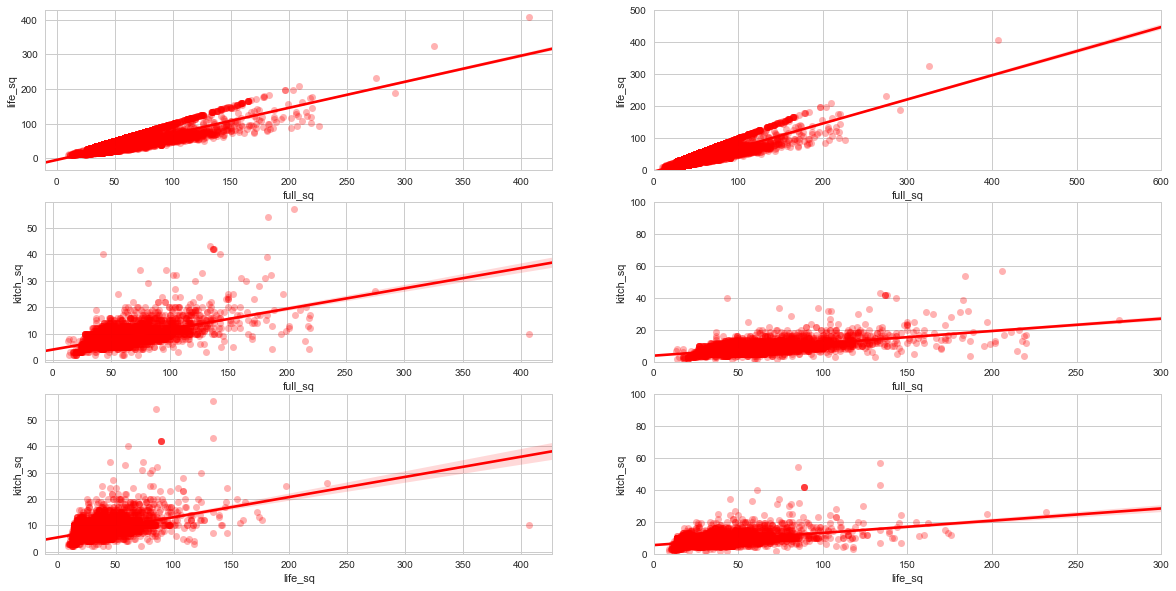

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(train_merge["full_sq"], train_merge["life_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(train_merge["full_sq"], train_merge["life_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(323)
sns.regplot(train_merge["full_sq"], train_merge["kitch_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(train_merge["full_sq"], train_merge["kitch_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(325)
sns.regplot(train_merge["life_sq"], train_merge["kitch_sq"], color = "red", scatter_kws={'alpha':0.3});
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(train_merge["life_sq"], train_merge["kitch_sq"], color = "red", scatter_kws={'alpha':0.3});

display(train_merge[["full_sq", "life_sq", "kitch_sq"]].describe());

In [30]:
test_too_high = []
test_floors_swapped = []

test_too_old = []
test_too_young = []

test_no_rooms = []
test_too_small = []

for i in range(len(disc_test)):
    if disc_test.loc[i, "floor"] > 85:
        test_too_high.append(i)
    if disc_test.loc[i, "max_floor"] > 85:
        test_too_high.append(i)
    if disc_test.loc[i, "max_floor"] < disc_test.loc[i, "floor"]:
        test_floors_swapped.append(i)
    
    if disc_test.loc[i, "build_year"] < 1500:
        test_too_young.append(i)
    if disc_test.loc[i, "build_year"] > 2020:
        test_too_old.append(i)
        
    if disc_test.loc[i, "num_room"] == 0:
        test_no_rooms.append(i)
    if test_merge.loc[i, "life_sq"] > 0 and disc_test.loc[i, "num_room"] > 0:    
        if test_merge.loc[i, "life_sq"]/disc_test.loc[i, "num_room"] < 4:
            test_too_small.append(i)

In [31]:
test_merge.loc[test_too_high, ["max_floor"]] = np.NaN
test_merge.loc[test_floors_swapped, ["max_floor"]] = np.NaN

test_merge.loc[test_too_old, ["build_year"]] = np.NaN
test_merge.loc[test_too_young, ["build_year"]] = np.NaN

test_merge.loc[test_no_rooms, ["num_room"]] = np.NaN
test_merge.loc[test_too_small, ["num_room"]] = np.NaN

,floor,max_floor,build_year,num_room
count,7662.000000,7019.000000,6055.000000,7660.000000
mean,7.652571,13.666192,1988.625764,1.873629
std,5.099418,5.866484,21.899159,0.811176
min,1.000000,1.000000,1875.000000,1.000000
25%,4.000000,9.000000,1969.000000,1.000000
50%,7.000000,14.000000,1986.000000,2.000000
75%,11.000000,17.000000,2013.000000,2.000000
max,41.000000,48.000000,2019.000000,7.000000


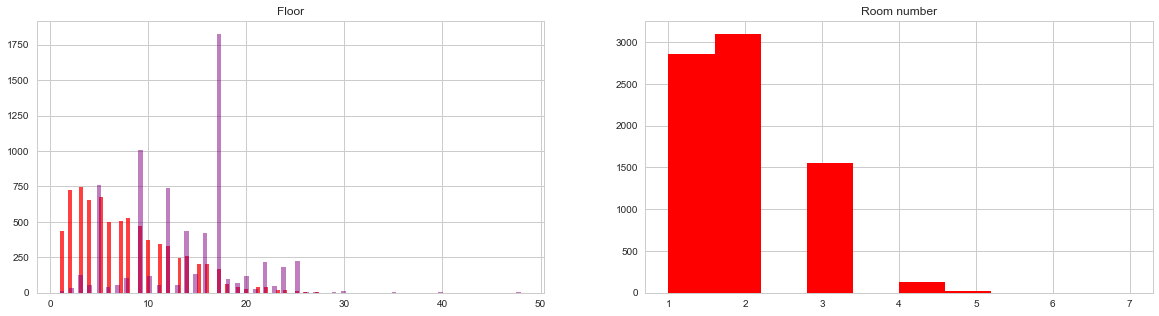

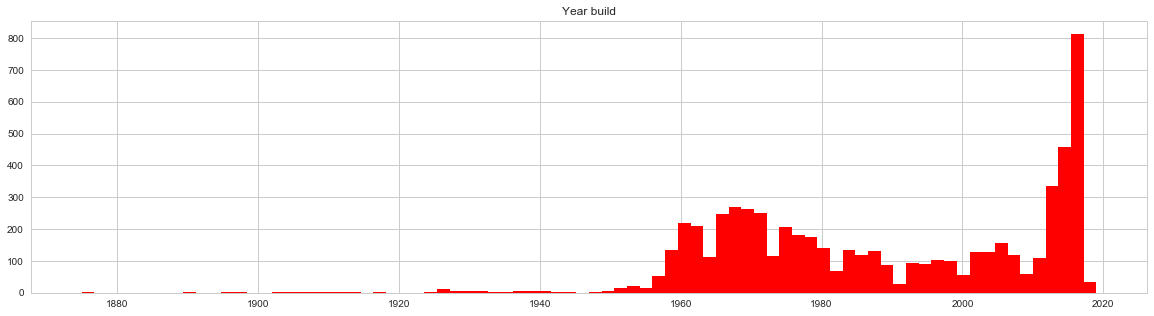

In [32]:
display(test_merge[["floor", "max_floor", "build_year", "num_room"]].describe())

plt.figure()
plt.subplot(121)
plt.title("Floor")
plt.hist(test_merge["floor"].dropna(), bins=100, color="red", alpha = 0.75);
plt.hist(test_merge["max_floor"].dropna(), bins=100, color="purple", alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(test_merge["num_room"].dropna(), color="red", bins=10);
plt.figure()
plt.title("Year build")
plt.hist(sorted(test_merge["build_year"].dropna()), color="red", bins=80);

In [33]:
for i in ["material", "state", "product_type"]:
    display(cat_train[i].value_counts())

1.0    14197
2.0     2993
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: material, dtype: int64

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

# Some exploration of the cleaned data

### Correlation matrix 

In [34]:
x = (cont_train.columns)
x = x.append(disc_train.columns).append(cat_train.columns)

In [35]:
cor = train_merge[x].corr()

C:\Users\Wegee\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


(array([ 0.1,  0.3,  0.5,  0.7,  0.9]), <a list of 5 Text yticklabel objects>)

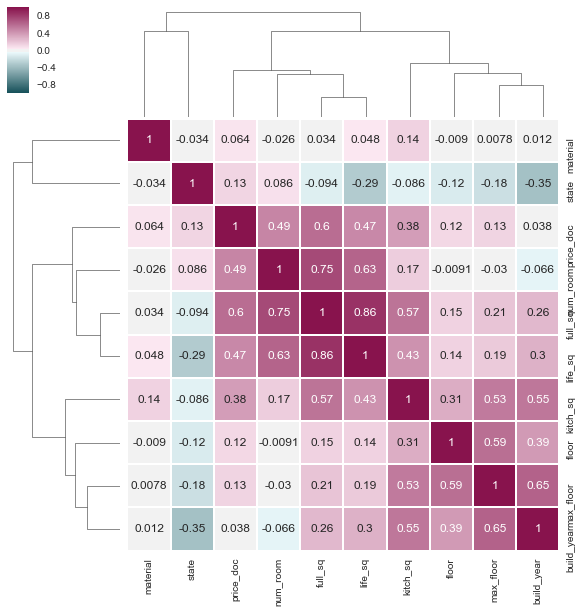

In [36]:
plt.figure(figsize=(10,10))
sns.clustermap(cor, square=True, linewidth=1, annot= True, cmap=cmap);
plt.xticks(rotation=45);
plt.yticks(rotation=0);

#cholesky = np.linalg.cholesky(cor)
#for i in cholesky:
#    print(i)

### Categorical features
<p>***Material***</p>
<p>When we look at the categorical features we can see that the material does not show to high correlation with the target variable. Maybe material 2 shows slightly higher, while material 5 slightly lower prices.<p> 
<p>***State***</p>
<p>when we look at the state we can see a increase of the target variable with higher state.</p>
<p>***Product type***</p>
<p>Product types does not have too much of an influence on the price</p>

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


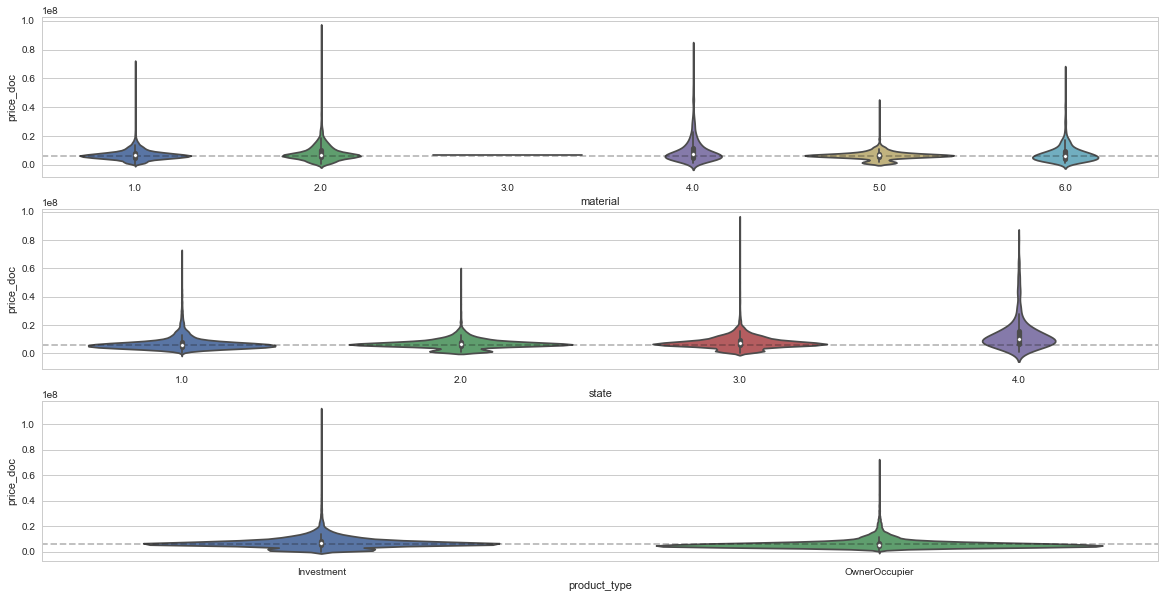

In [37]:
plt.figure(figsize=(20,10))
ax = plt.subplot(311)
sns.violinplot(x="material", y="price_doc", data=train_merge)
ax.hlines(np.median(train_merge["price_doc"]),-1,6, linestyle='--', alpha=0.3)
ax = plt.subplot(312)
sns.violinplot(x="state", y="price_doc", data=train_merge)
ax.hlines(np.median(train_merge["price_doc"]),-1,6, linestyle='--', alpha=0.3)
ax = plt.subplot(313)
sns.violinplot(x="product_type", y="price_doc", data=train_merge)
ax.hlines(np.median(train_merge["price_doc"]),-1,6, linestyle='--', alpha=0.3)

# Continous variables
<p>There are some obvious correlations between those. Lets look at them some more and maybe group them in a new variable, in order to reduce dimensionality.</p>

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


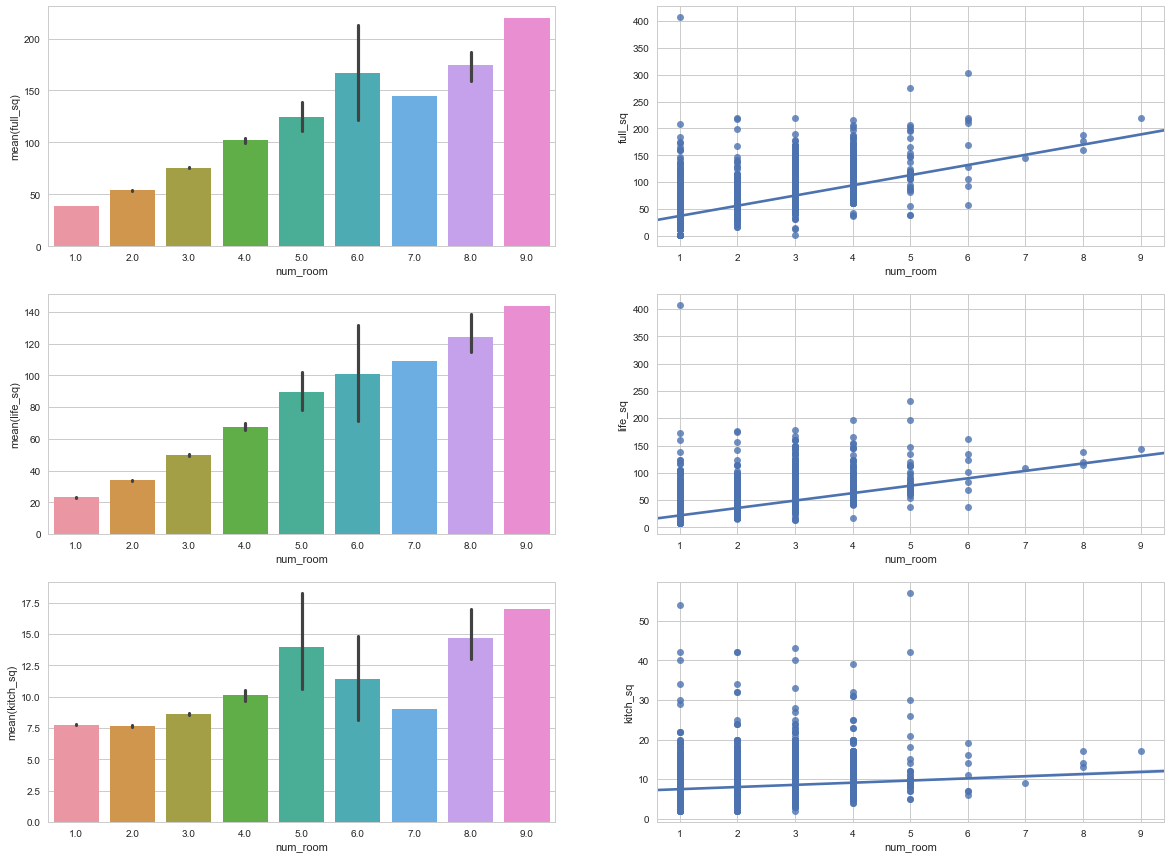

In [38]:
plt.figure(figsize=(20,15))
plt.subplot(321)
sns.barplot("num_room", "full_sq", data=train_merge)
plt.subplot(322)
sns.regplot("num_room", "full_sq", data=train_merge)
plt.subplot(323)
sns.barplot("num_room", "life_sq", data=train_merge)
plt.subplot(324)
sns.regplot("num_room", "life_sq", data=train_merge)
plt.subplot(325)
sns.barplot("num_room", "kitch_sq", data=train_merge)
plt.subplot(326)
sns.regplot("num_room", "kitch_sq", data=train_merge)

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


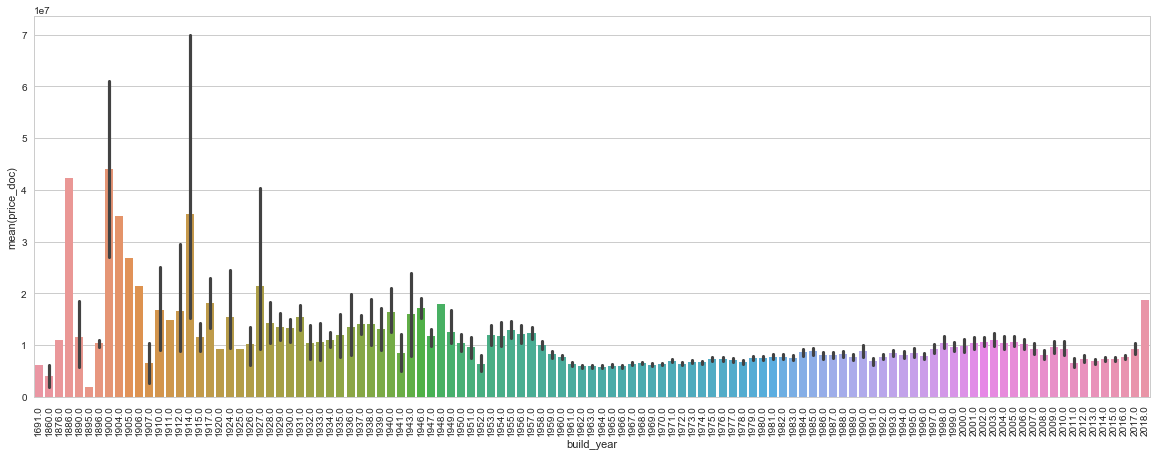

In [39]:
plt.figure(figsize=(20,7))
sns.barplot("build_year", "price_doc", data=train_merge);
plt.xticks(rotation=90);

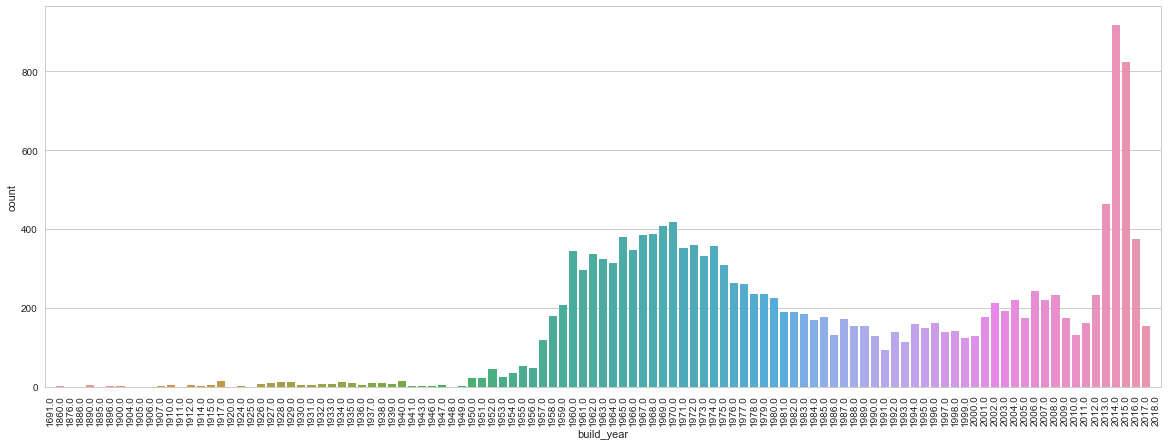

In [40]:
plt.figure(figsize=(20,7))
sns.countplot("build_year", data=train_merge);
plt.xticks(rotation=90);

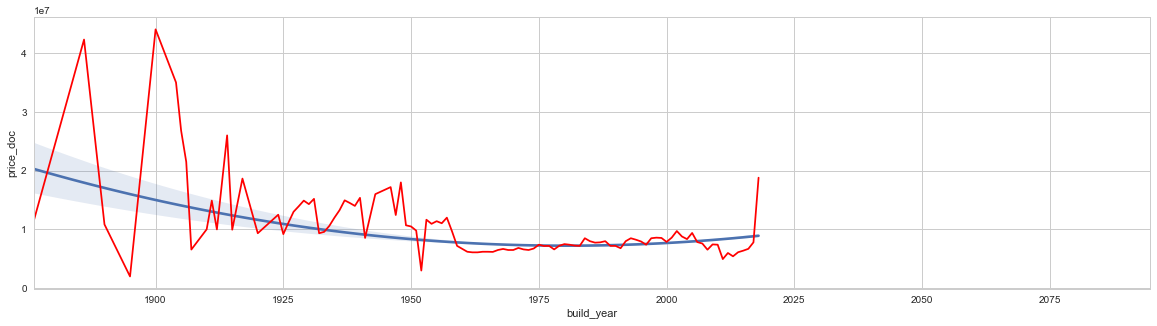

In [41]:
aver = train_merge.groupby("build_year")[["build_year", "price_doc"]].median()
recent = train_merge[["build_year", "price_doc"]][train_merge["build_year"] > 1850]
sns.regplot("build_year", "price_doc", data=recent, scatter=False, order=2,truncate=True)
plt.plot(aver["build_year"], aver["price_doc"], color ="red")

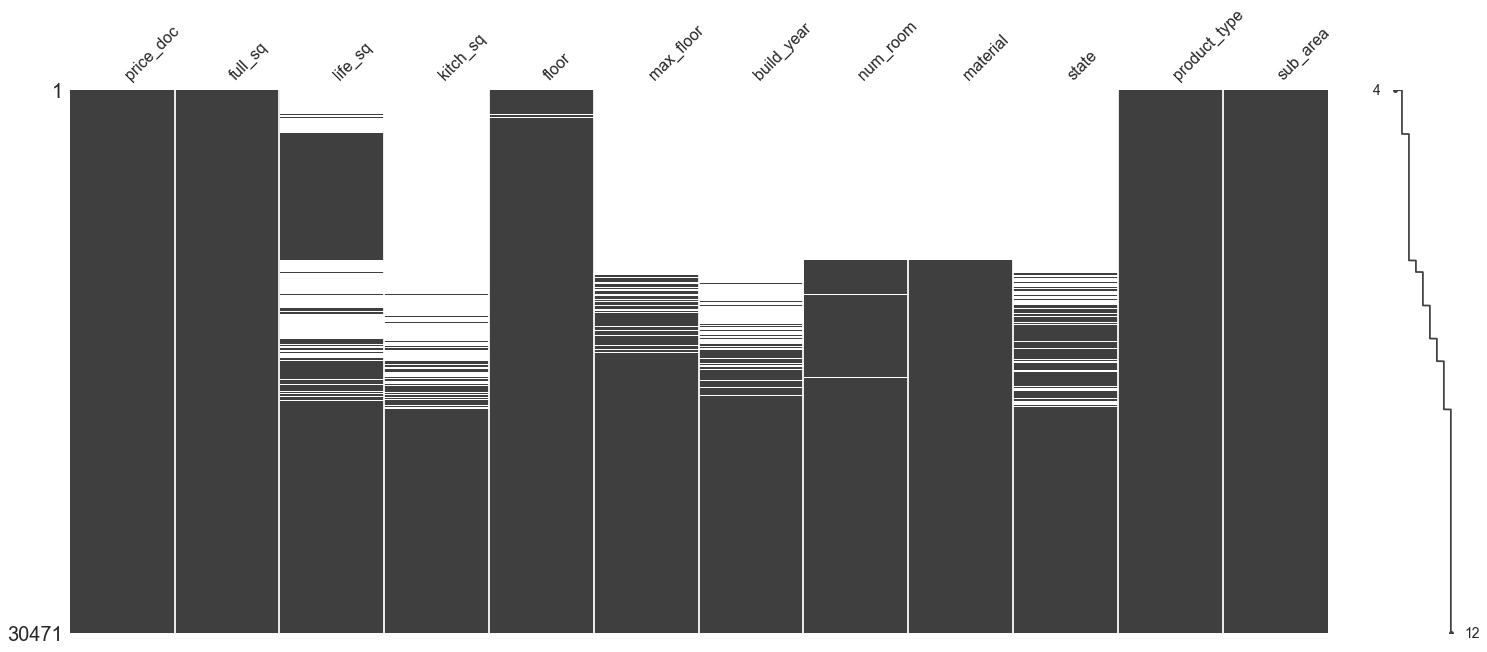

In [42]:
msn.matrix(train_merge[x], sort="ascending")

# Neighborhood features

<p>Ok so here we gonna prepare the neighborhood features. I will start by encoding the categorical features of the dataset. Some features are not interpretable or obviously do not contain any viable information and therefore will be dropped.</p>
<p>Binary features with "Yes/No" values will be label encoded while non-binary categorical features will be one hot encoded.</p> 
<p>In the second step I will handle missing values. I will start by looking at the continous values. Here features with too much missing values will directly dropped while the remaining feature's missing values will be imputed. Afterwards the continous features are going to be reduced via principal component analysis</p> 
<p>The remaining numeric features will be imputed.</p>

In [43]:
neighborhood = train_merge.drop(['full_sq', 'life_sq', 'kitch_sq', 'floor', 'max_floor',
       'build_year', 'num_room', 'material', 'state', 'product_type', 'sub_area', 'price_doc'], axis=1)

neighborhood_test = test_merge.drop(['full_sq', 'life_sq', 'kitch_sq', 'floor', 'max_floor',
       'build_year', 'num_room', 'material', 'state', 'product_type', 'sub_area'], axis=1)

a = [0 for i in range(neighborhood.shape[0])]
b = [1 for i in range(neighborhood_test.shape[0])]
a = pd.Series(a)
b = pd.Series(b)

neighborhood["DATA"] = a
neighborhood_test["DATA"] = b
 
neighborhood_merge = pd.concat([neighborhood, neighborhood_test])

DATA = neighborhood_merge["DATA"]

In [44]:
print(neighborhood_merge.shape)
print(neighborhood.shape)
print(neighborhood_test.shape)

(38133, 380)
(30471, 380)
(7662, 380)


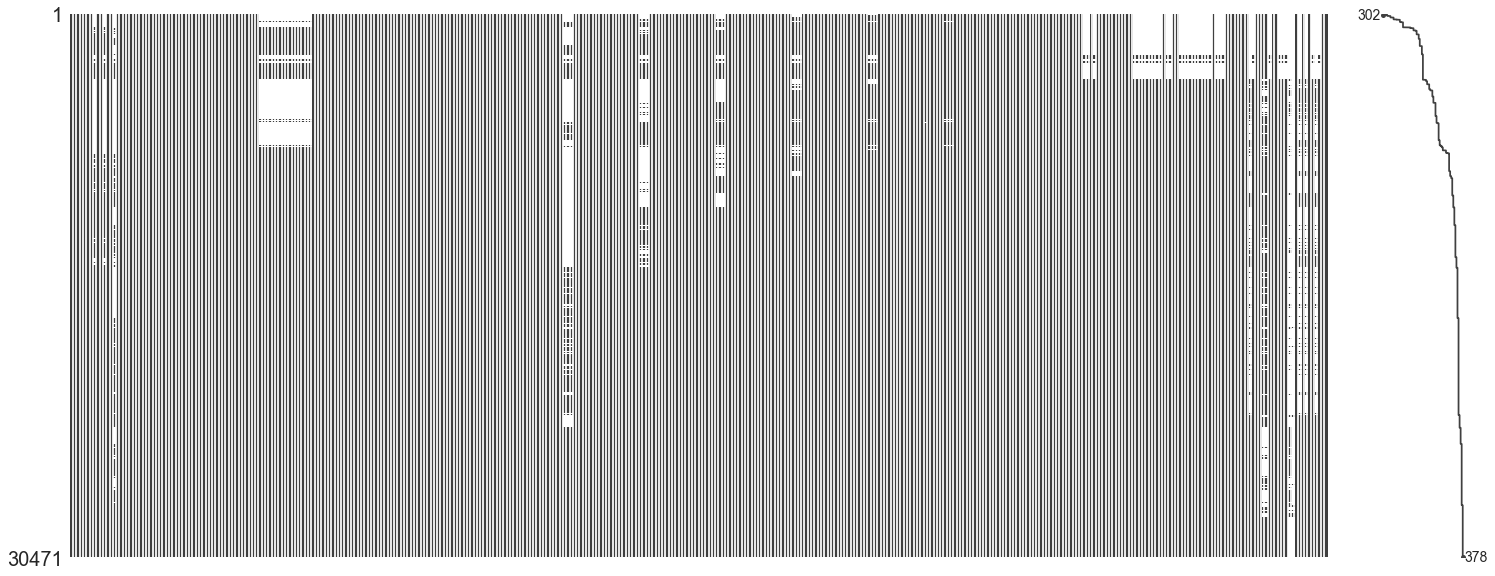

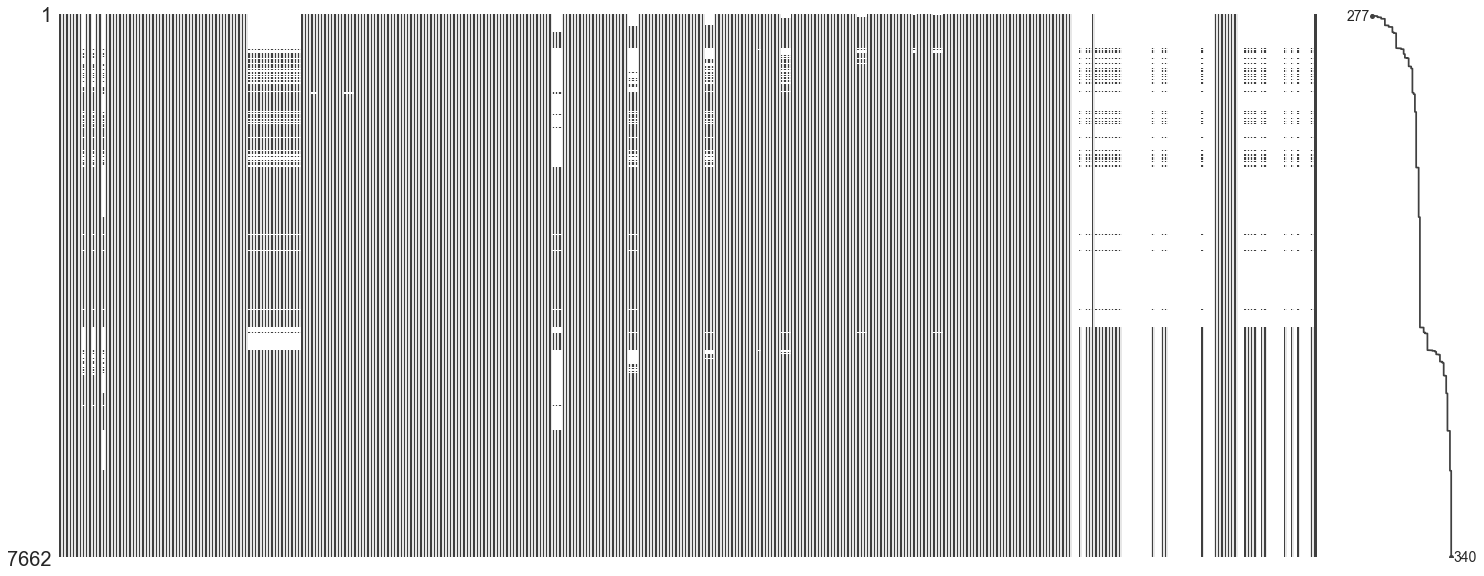

In [45]:
msn.matrix(neighborhood, sort="ascending")
msn.matrix(neighborhood_test, sort="ascending")

In [46]:
obj = neighborhood.columns[neighborhood.dtypes == "object"]

display(neighborhood[obj].head())
neighborhood["old_education_build_share"].value_counts()

obj_test = neighborhood_test.columns[neighborhood_test.dtypes == "object"]

display(neighborhood_test[obj_test].head())
neighborhood_test["old_education_build_share"].value_counts()

obj_merge = neighborhood_merge.columns[neighborhood_merge.dtypes == "object"]

display(neighborhood_merge[obj_merge].head())
neighborhood_merge["old_education_build_share"].value_counts()

,timestamp,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,child_on_acc_pre_school,modern_education_share,old_education_build_share
0,2011-08-20,no,no,no,no,no,no,no,no,no,no,no,no,good,#!,NaN,NaN
1,2011-08-23,yes,no,no,no,no,no,no,no,no,no,no,no,excellent,#!,NaN,NaN
2,2011-08-27,no,no,no,no,yes,no,no,no,no,no,no,no,poor,#!,NaN,NaN
3,2011-09-01,no,no,no,no,no,no,no,no,no,no,no,no,good,#!,NaN,NaN
4,2011-09-05,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent,#!,NaN,NaN


,timestamp,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,child_on_acc_pre_school,modern_education_share,old_education_build_share
0,2015-07-01,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory,NaN,"95,4918","8,2517"
1,2015-07-01,no,no,no,no,no,no,no,no,no,no,no,no,no data,NaN,"95,4918","8,2517"
2,2015-07-01,no,yes,no,yes,yes,no,no,no,no,no,no,no,poor,NaN,"95,4918","8,2517"
3,2015-07-01,no,no,no,no,no,no,no,no,no,no,no,no,no data,NaN,"95,4918","8,2517"
4,2015-07-01,no,no,no,no,no,no,no,no,no,no,no,no,no data,NaN,"95,4918","8,2517"


,timestamp,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,child_on_acc_pre_school,modern_education_share,old_education_build_share
0,2011-08-20,no,no,no,no,no,no,no,no,no,no,no,no,good,#!,NaN,NaN
1,2011-08-23,yes,no,no,no,no,no,no,no,no,no,no,no,excellent,#!,NaN,NaN
2,2011-08-27,no,no,no,no,yes,no,no,no,no,no,no,no,poor,#!,NaN,NaN
3,2011-09-01,no,no,no,no,no,no,no,no,no,no,no,no,good,#!,NaN,NaN
4,2011-09-05,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent,#!,NaN,NaN


25,47     13662
23,14      7978
8,2517     6918
Name: old_education_build_share, dtype: int64

In [47]:
#to drop time stamp 
#yes no -> encode 0, 1
#ecology also label encode (-> its ordinal)
#seemingly , has to be replaced with . in hild_on_acc_pre_school modern_education_share old_education_build_share
#we can also drop id

neighborhood.drop(["child_on_acc_pre_school", "modern_education_share", "old_education_build_share", "timestamp", "id"], axis = 1, inplace = True)
obj = neighborhood.columns[neighborhood.dtypes == "object"]
display(neighborhood[obj].head())

neighborhood_test.drop(["child_on_acc_pre_school", "modern_education_share", "old_education_build_share", "timestamp", "id"], axis = 1, inplace = True)
obj_test = neighborhood_test.columns[neighborhood_test.dtypes == "object"]

neighborhood_merge.drop(["child_on_acc_pre_school", "modern_education_share", "old_education_build_share", "timestamp", "id"], axis = 1, inplace = True)
obj_merge = neighborhood_merge.columns[neighborhood_merge.dtypes == "object"]

,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,no,no,no,no,no,no,no,no,no,no,no,no,good
1,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,no,no,no,no,no,no,no,no,no,no,no,no,good
4,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent


# Ok so lets save the encoded features for later until we have dealt with the numeric ones

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for o in obj[:-1]:
    neighborhood[o] = le.fit_transform(neighborhood[o])
encoded_features = pd.get_dummies(neighborhood["ecology"])
encoded_features.drop(["no data"], axis=1, inplace=True)
neighborhood.drop("ecology", axis=1, inplace=True)

for o in obj_test[:-1]:
    neighborhood_test[o] = le.fit_transform(neighborhood_test[o])
encoded_features_test = pd.get_dummies(neighborhood_test["ecology"])
encoded_features_test.drop(["no data"], axis=1, inplace=True)
neighborhood_test.drop("ecology", axis=1, inplace=True)

for o in obj_merge[:-1]:
    neighborhood_merge[o] = le.fit_transform(neighborhood_merge[o])
encoded_features_merge = pd.get_dummies(neighborhood_merge["ecology"])
encoded_features_merge.drop(["no data"], axis=1, inplace=True)
neighborhood_merge.drop("ecology", axis=1, inplace=True)

# Feature Reduction 

## I will try to reduce the dimensionality of this data sets with different techniques
### 1. PCA
### 2. XHBoost
### 3. ???

## Principal Component Analysis

### Ok so now lets attempt to reduce the dimensionality of the remaining features by applying a PCA.
### For the PCA to yield reliable results we have to do some data transformation first.

<ol>
    <li><p>Pick all numeric features.</p></li>
    <li><p>Drop features with too many missing values.</p></li>
    <li><p>Scale data -> minMaxScaler.</p></li>
    <li><p>Remove features which do not show any variance.</p></li>
    <li><p>Remove outlier.</p></li>
    <li><p>Check normality and maybe try transformation</p></li>
    <li><p>PCA</p></li>
</ol>

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


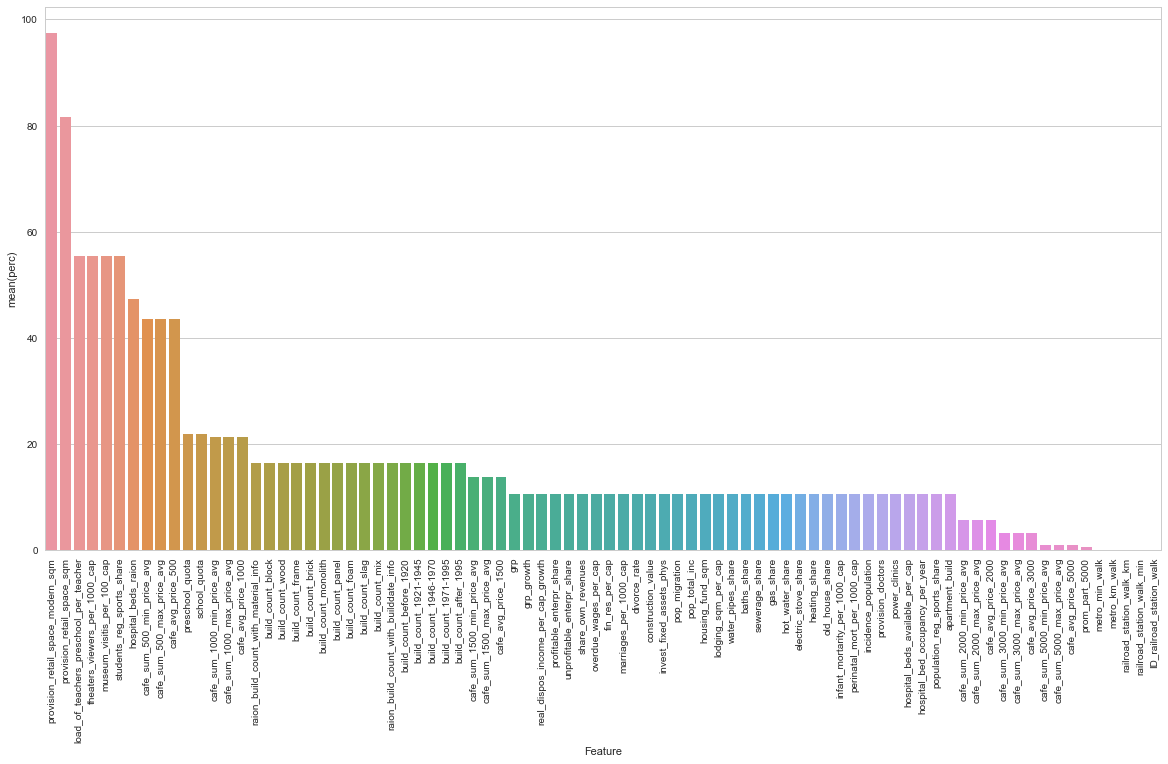

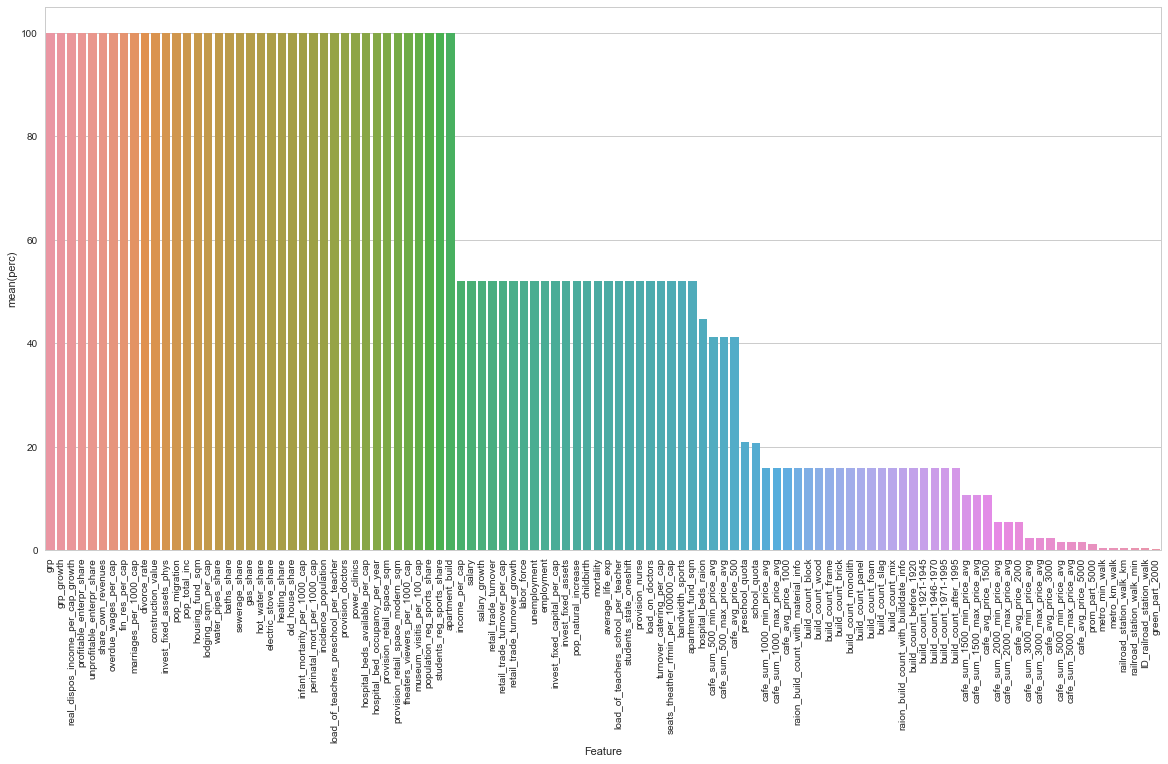

In [49]:
m = neighborhood.isnull().sum()

train = zip(neighborhood.columns, m)
train = sorted(train, key = lambda x: x[1], reverse=True)
train = pd.DataFrame(train)
train.columns = ["Feature", "Missing"]
train = train[train["Missing"] > 0]
train["perc"] = train["Missing"]/len(train_merge)*100

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(train["Feature"], train["perc"])

m_test = neighborhood_test.isnull().sum()
test = zip(neighborhood_test.columns, m_test)
test = sorted(test, key = lambda x: x[1], reverse=True)
test = pd.DataFrame(test)
test.columns = ["Feature", "Missing"]
test = test[test["Missing"] > 0]
test["perc"] = test["Missing"]/len(test_merge)*100

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(test["Feature"], test["perc"])

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


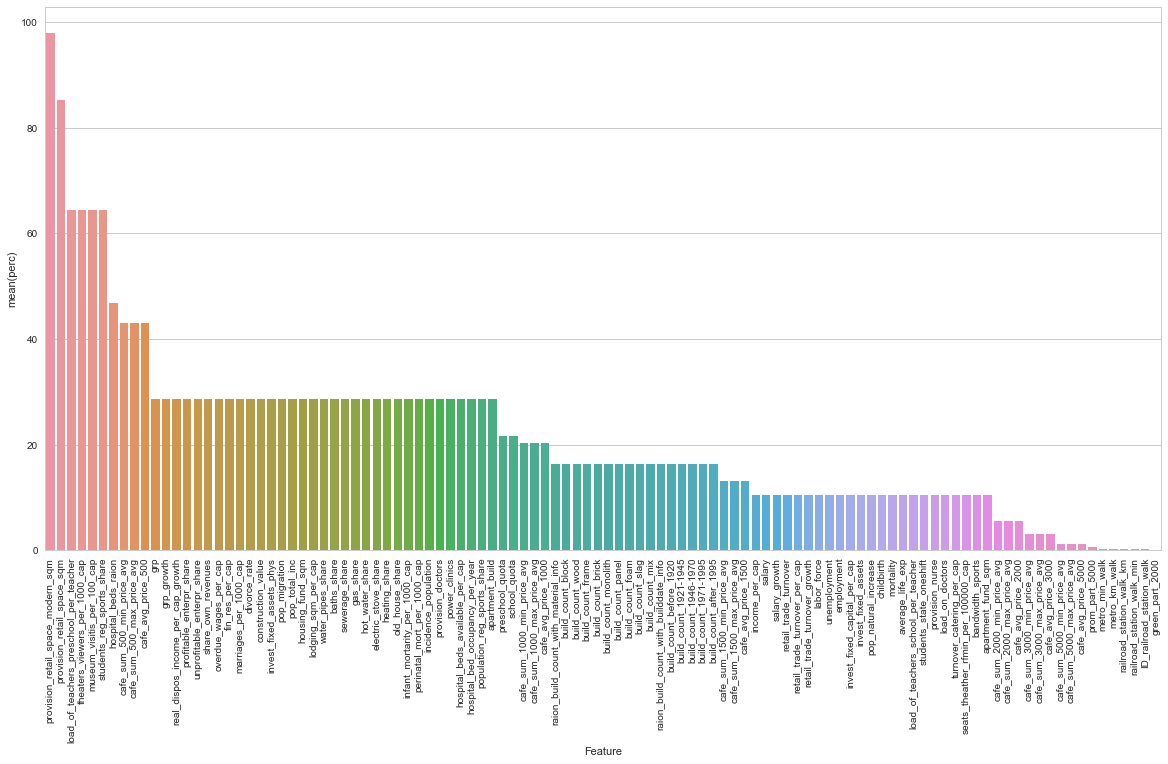

In [50]:
m_merge = neighborhood_merge.isnull().sum()


merge = zip(neighborhood_merge.columns, m_merge)
merge = sorted(merge, key = lambda x: x[1], reverse=True)
merge = pd.DataFrame(merge)
merge.columns = ["Feature", "Missing"]
merge = merge[merge["Missing"] > 0]
merge["perc"] = merge["Missing"]/neighborhood_merge.shape[0]*100

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(merge["Feature"], merge["perc"])


<p>Gonna drop features which show too much missing values. I will choose >20% missing as cutoff. The other features
are going to be imputed. I will first try a simple median impuation. I will drop features in both datasets.</p>

In [51]:
train = train[train["perc"] > 20]
test = test[test["perc"] > 20]

a = [i for i in train["Feature"]]
b = [i for i in test["Feature"]]
c = set(a+b)

neighborhood.drop(c, axis=1, inplace = True)
neighborhood_test.drop(c, axis=1, inplace = True)
neighborhood_merge.drop(c, axis=1, inplace=True)

# Lets try VIF
### well maybe maybe not XD


In [52]:
neighborhood.fillna(neighborhood.median(), inplace=True)
neighborhood_test.fillna(neighborhood_test.median(), inplace=True)
neighborhood_merge.fillna(neighborhood_merge.median(), inplace=True);

In [53]:
#scale data

from sklearn.preprocessing import MinMaxScaler, normalize

scaler = MinMaxScaler()

neigh = scaler.fit_transform(neighborhood)
neigh_test = scaler.fit_transform(neighborhood_test)
neigh_merge = scaler.fit_transform(neighborhood_merge)

neigh = normalize(neigh)
neigh_test = normalize(neigh_test)
neigh_merge = normalize(neigh_merge)

neigh = pd.DataFrame(neigh)
neigh.columns = neighborhood.columns

neigh_test = pd.DataFrame(neigh_test)
neigh_test.columns = neighborhood.columns

neigh_merge = pd.DataFrame(neigh_merge)
neigh_merge.columns = neighborhood.columns

neighborhood = neigh
neighborhood_test = neigh_test
neighborhood_merge = neigh_merge

In [54]:
import heapq
from sklearn.feature_selection import VarianceThreshold

print(neighborhood.shape)
vt = VarianceThreshold()
vt.fit_transform(neighborhood)
print(heapq.nsmallest(41, vt.variances_))
print(heapq.nlargest(31,vt.variances_))
print(neighborhood.shape)

(30471, 303)
[0.0, 3.5687319051583634e-05, 4.3907489767700027e-05, 5.2499271122478573e-05, 5.4923441479789401e-05, 6.1444207759388798e-05, 6.4904243802407706e-05, 6.689716215416723e-05, 7.9233554704317112e-05, 7.9475637964296442e-05, 8.0648947324172453e-05, 8.4205864947570636e-05, 8.4726837760009817e-05, 9.7120326612096938e-05, 9.9353913064533062e-05, 0.00010481328955323634, 0.00010510675309411519, 0.00010806760034351693, 0.00011270333607915163, 0.00011672712706771743, 0.0001172202116152952, 0.00012001601161451283, 0.00012059843017525218, 0.00012243183592378938, 0.00012500384188726766, 0.00012688558095583544, 0.00012985166728003665, 0.00013606953194574844, 0.00013612290895776273, 0.00013897931032087638, 0.00013898193819565538, 0.00013898193820218582, 0.00014100376499897688, 0.00014570105629288478, 0.00014908627377855575, 0.00015152378756059891, 0.00015165918463111498, 0.00015363084584080579, 0.0001554509672783331, 0.0001559438775158479, 0.00015919298157976664]
[0.0090942191188187402, 0

# For the moment gonna leave all features in here

In [55]:
#check normalit
from scipy.stats import normaltest, shapiro
not_normal = []

for i in neighborhood:
    if shapiro(np.log1p(neighborhood[i]))[1] != 0:
        not_normal.append(i)
print(not_normal) 

C:\Users\Wegee\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


['rent_price_3room_eco', 'DATA']


C:\Users\Wegee\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1323: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Check for outlier via IsolationForest 

In [56]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest()
x = iso.fit(neighborhood)
pred = x.predict(neighborhood)

iso_test = IsolationForest()
x_test = iso_test.fit(neighborhood_test)
pred_test = x_test.predict(neighborhood_test)

In [57]:
iso_merge = IsolationForest()
x_merge = iso_merge.fit(neighborhood_merge)
pred_merge = x_merge.predict(neighborhood_merge)

In [58]:
unique, counts = numpy.unique(pred, return_counts=True)
train = dict(zip(unique, counts))

unique_test, counts_test = numpy.unique(pred_test, return_counts=True)
test = dict(zip(unique_test, counts_test))

unique_merge, counts_merge = numpy.unique(pred_merge, return_counts=True)
merge = dict(zip(unique_merge, counts_merge))

print(train)
print(test)
print(merge)

{1: 27423, -1: 3048}
{1: 6895, -1: 767}
{1: 34319, -1: 3814}


In [59]:
# After concanation indexes restart at 0 for the test dataframe therefore we gonna replace it with continous indexing
indices = pd.Series(np.arange(0,neighborhood_merge.shape[0])) 
neighborhood_merge.set_index(indices, inplace=True)

In [60]:
pred_bools = pd.DataFrame(pred, columns=["outlier"])
neighborhood_noout  = pd.concat([neighborhood, pred_bools], axis=1)
neighborhood_noout = neighborhood_noout[neighborhood_noout["outlier"] == 1]
neighborhood_noout.drop("outlier", axis=1, inplace=True)

pred_bools_test = pd.DataFrame(pred_test, columns=["outlier"])
neighborhood_noout_test  = pd.concat([neighborhood_test, pred_bools_test], axis=1)
neighborhood_noout_test = neighborhood_noout_test[neighborhood_noout_test["outlier"] == 1]
neighborhood_noout_test.drop("outlier", axis=1, inplace=True)

pred_bools_merge = pd.DataFrame(pred_merge, columns=["outlier"])

neighborhood_noout_merge  = pd.concat([neighborhood_merge, pred_bools_merge], axis=1)
neighborhood_noout_merge = neighborhood_noout_merge[neighborhood_noout_merge["outlier"] == 1]
neighborhood_noout_merge.drop("outlier", axis=1, inplace=True)

In [61]:
print(neighborhood_noout.shape)
print(neighborhood_noout_test.shape)
print(neighborhood_noout_merge.shape)

(27423, 303)
(6895, 303)
(34319, 303)


In [62]:
from sklearn.decomposition import PCA

pca = PCA()
pca = pca.fit(neighborhood_noout)
explained = pca.explained_variance_ratio_

pca_test = PCA(n_components = 100)
pca_test = pca_test.fit(neighborhood_noout_test)
explained_test = pca_test.explained_variance_ratio_

pca_merge = PCA(n_components = 100)
pca_merge = pca_merge.fit(neighborhood_noout_merge)
explained_merge = pca_merge.explained_variance_ratio_

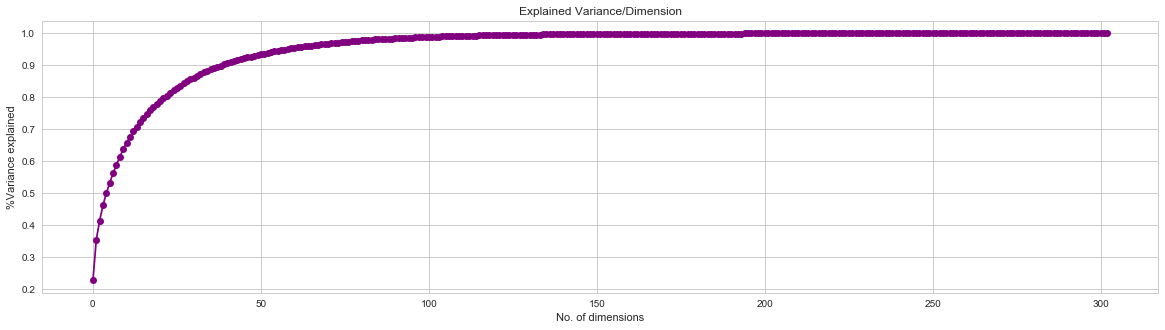

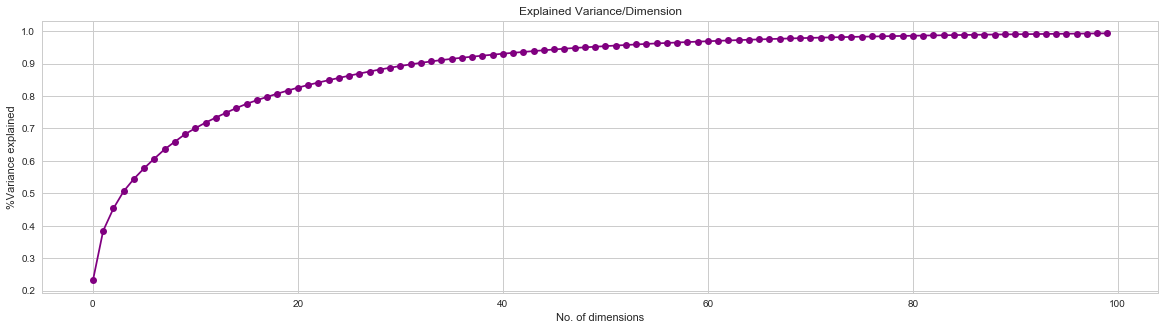

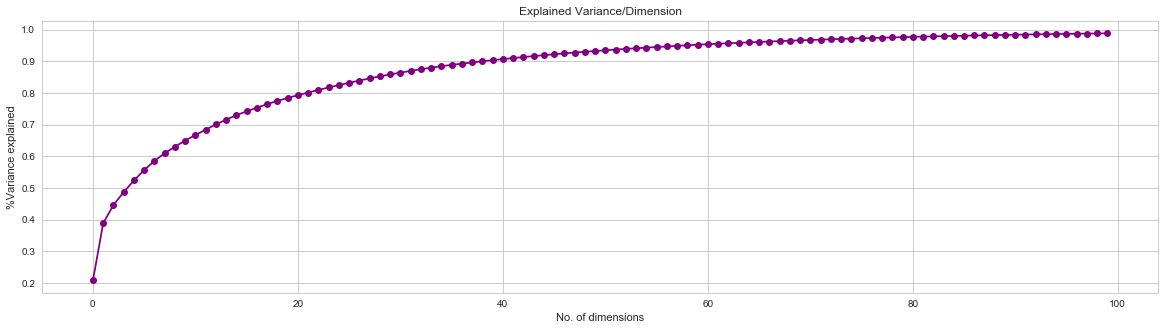

In [63]:
pca = PCA()
pca = pca.fit(neighborhood_noout)
explained = pca.explained_variance_ratio_
plt.figure()
plt.plot(range(303), np.cumsum(explained), 'o-', color='purple')
plt.title("Explained Variance/Dimension")
plt.xlabel("No. of dimensions")
plt.ylabel("%Variance explained")
plt.figure()
plt.plot(range(100), np.cumsum(explained_test), 'o-', color='purple')
plt.title("Explained Variance/Dimension")
plt.xlabel("No. of dimensions")
plt.ylabel("%Variance explained")
plt.figure()
plt.plot(range(100), np.cumsum(explained_merge), 'o-', color='purple')
plt.title("Explained Variance/Dimension")
plt.xlabel("No. of dimensions")
plt.ylabel("%Variance explained")

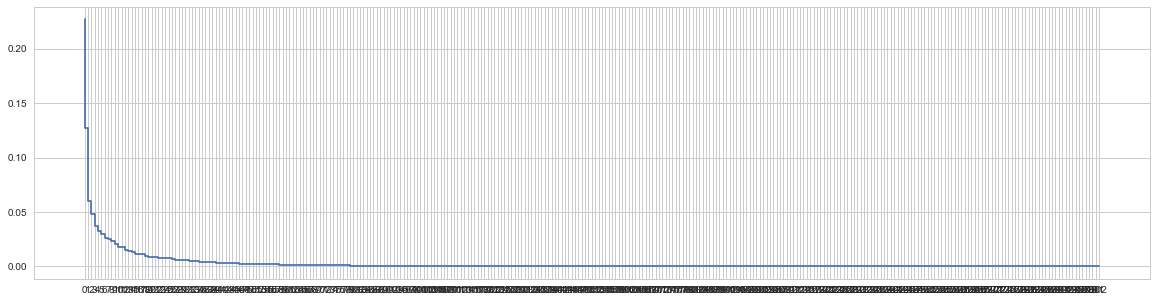

In [64]:
import heapq
plt.figure()
plt.step(range(303), explained)
plt.xticks(range(303));
dimensions = pca.components_[:3]
#plt.figure()
#ind = []
#for i, dim in enumerate(dimensions):
#    plt.subplot(1,3,i+1)
#    plt.bar(range(len(neighborhood.columns)), dim)
#    ind.append(np.argpartition(dim, -15)[-15:])



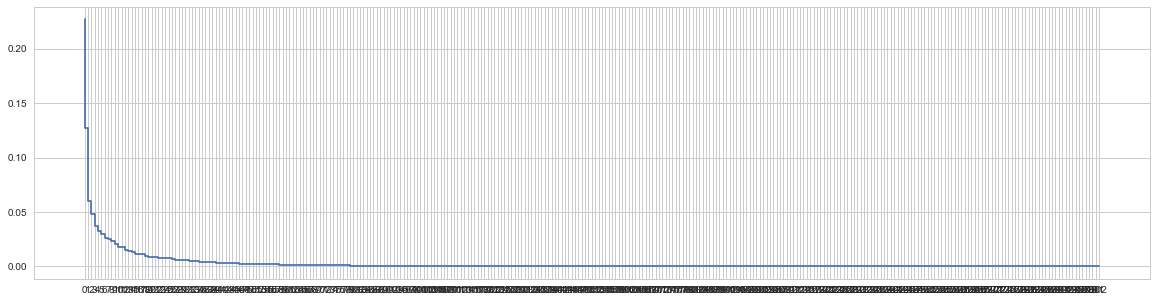

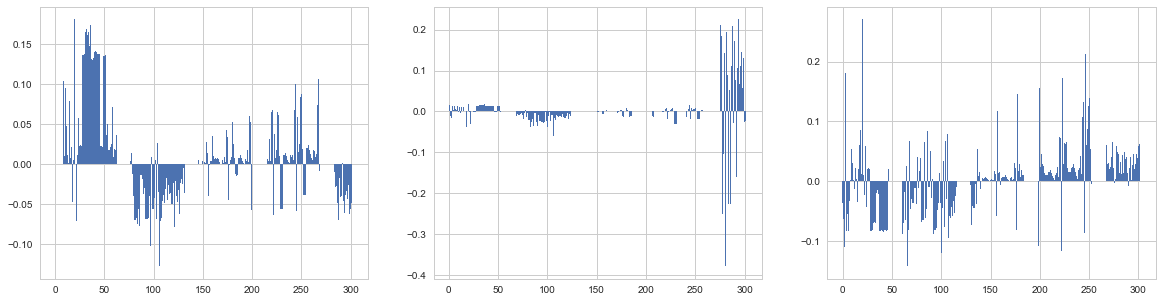

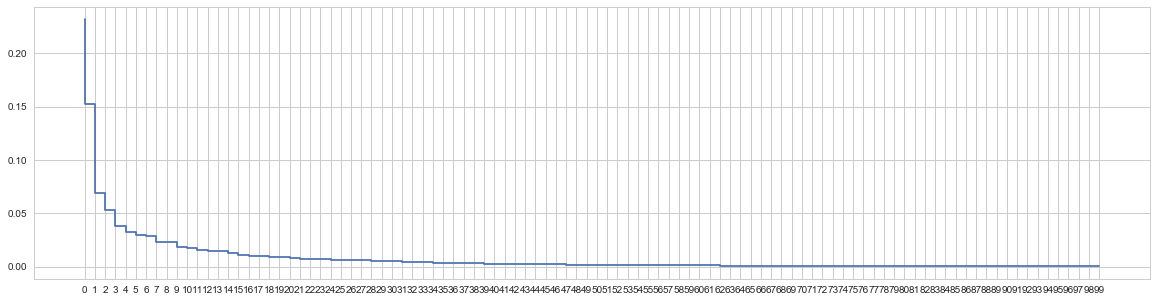

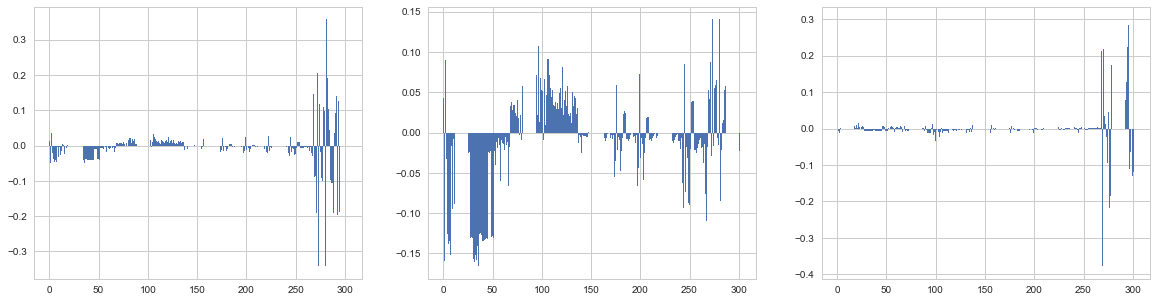

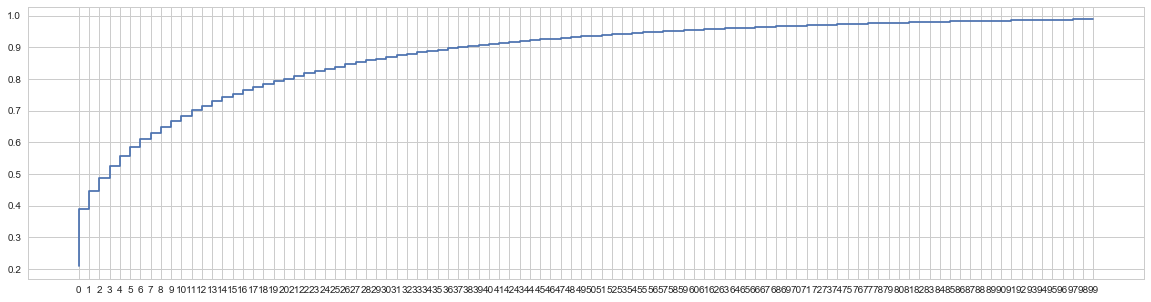

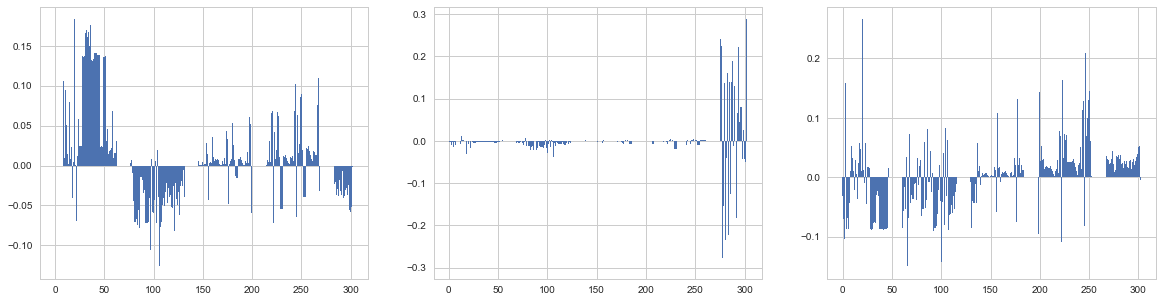

In [65]:
import heapq
plt.figure()
plt.step(range(303), explained)
plt.xticks(range(303));
dimensions = pca.components_[:3]
plt.figure()
ind = []
for i, dim in enumerate(dimensions):
    plt.subplot(1,3,i+1)
    plt.bar(range(len(neighborhood.columns)), dim)
    ind.append(np.argpartition(dim, -15)[-15:])
#for i in ind:
#    print(neighborhood.iloc[i])
    
plt.figure()
plt.step(range(100), explained_test)
plt.xticks(range(100));
dimensions_test = pca_test.components_[:3]
plt.figure()
ind_test = []
for i, dim in enumerate(dimensions_test):
    plt.subplot(1,3,i+1)
    plt.bar(range(len(neighborhood_test.columns)), dim)
    ind_test.append(np.argpartition(dim, -15)[-15:])
#for i in ind_test:
#    print(neighborhood_test.iloc[i])

plt.figure()
plt.step(range(100), np.cumsum(explained_merge))
plt.xticks(range(100));
dimensions_merge = pca_merge.components_[:3]
plt.figure()
ind_merge = []
for i, dim in enumerate(dimensions_merge):
    plt.subplot(1,3,i+1)
    plt.bar(range(len(neighborhood_merge.columns)), dim)
    ind_merge.append(np.argpartition(dim, -15)[-15:])
#for i in ind_test:
#    print(neighborhood_test.iloc[i])

In [66]:
merge_comps = pca_merge.transform(neighborhood_merge)
pd.DataFrame(merge_comps).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.354627,-0.297374,-0.112634,-0.096017,-0.083472,-0.225240,-0.042709,-0.008910,-0.029648,0.090979,...,-0.014405,0.016531,-0.005985,-0.023437,0.010013,0.006402,0.014587,0.020872,0.018035,-0.032706
1,0.263586,-0.324464,0.005044,-0.074913,-0.126623,-0.163429,-0.042650,-0.044417,0.008179,0.020839,...,-0.005672,-0.015891,0.004789,-0.010589,0.032930,-0.011109,0.008840,-0.010358,0.044715,-0.006023
2,0.284913,-0.344006,0.100858,-0.062245,-0.166297,-0.028371,0.083542,-0.021989,0.030382,-0.177297,...,0.000525,-0.001484,-0.039168,-0.027118,0.007757,0.020296,-0.008182,-0.003054,0.021103,-0.041434
3,0.350789,-0.275135,-0.285777,-0.018801,-0.071231,-0.154035,0.003204,0.039132,-0.019810,0.012111,...,-0.004143,-0.000649,-0.011342,-0.009233,0.012317,-0.009470,0.026196,-0.005824,0.024730,0.005024
4,0.265750,-0.183075,0.277443,-0.166736,-0.137933,-0.130064,0.036439,0.013974,0.120889,0.125519,...,0.063046,0.013257,-0.044902,0.023666,0.052307,-0.034413,0.057878,-0.052546,0.040786,0.032324


In [156]:
#neighborhood_merge.index(neighborhood_merge[neighborhood_merge["DATA"] == 0])
#kick sub area for the moment
i = max(DATA[DATA == 0].index)
print(i)
princ_comp_train = pd.DataFrame(merge_comps).iloc[:30471]
encoded_features_train = encoded_features_merge.iloc[:30471]
main_train = train_merge[['full_sq', 'life_sq', 'kitch_sq', 'floor', 
                          'max_floor', 'build_year', 'num_room', 'material',
                          'state', 'product_type', 'price_doc']]

print(main_train.shape)

30470
(30471, 11)


In [157]:
mat = pd.get_dummies(main_train["material"])
mat.drop(mat.columns[len(mat.columns)-1], axis=1, inplace=True)
mat.columns = ["mat1" ,"mat2" ,"mat3" ,"mat4" ,"mat5"]
sta = pd.get_dummies(main_train["state"])
sta.drop(sta.columns[len(sta.columns)-1], axis=1, inplace=True)
sta.columns = ["worst", "bad", "gud"]
p_type = pd.get_dummies(main_train["product_type"])
p_type.drop(p_type.columns[len(p_type.columns)-1], axis=1, inplace=True)
#sub_a = pd.get_dummies(main_train["sub_area"])
#sub_a.drop(sub_a.columns[len(sub_a.columns)-1], axis=1, inplace=True)

In [158]:
main_train_enc = main_train.copy()
main_train_enc.drop(["material", "state", "product_type"],axis=1,inplace=True)
main_train_enc = pd.concat([main_train_enc, mat, sta, p_type], axis=1)

In [159]:
x = (main_train_enc)
y =  pd.DataFrame(merge_comps).iloc[:30471]
y = y.iloc[:,:40]
z = encoded_features_merge.iloc[:30471]

In [160]:
princ_comp_test = pd.DataFrame(merge_comps).iloc[30471:]
encoded_features_test = encoded_features_merge.iloc[30471:]
main_test = test_merge[['full_sq', 'life_sq', 'kitch_sq', 'floor', 
                          'max_floor', 'build_year', 'num_room', 'material',
                          'state', 'product_type', ]]

print(main_test.shape)

mat_test = pd.get_dummies(main_test["material"])
mat_test.drop(mat_test.columns[len(mat_test.columns)-1], axis=1, inplace=True)
mat_test.columns = ["mat1" ,"mat2" ,"mat3" ,"mat4" ,"mat5"]
sta_test = pd.get_dummies(main_test["state"])
sta_test.drop(sta_test.columns[len(sta_test.columns)-1], axis=1, inplace=True)
sta_test.columns = ["worst", "bad", "gud"]
p_type_test = pd.get_dummies(main_test["product_type"])
p_type_test.drop(p_type_test.columns[len(p_type_test.columns)-1], axis=1, inplace=True)
#sub_a = pd.get_dummies(main_train["sub_area"])
#sub_a.drop(sub_a.columns[len(sub_a.columns)-1], axis=1, inplace=True)

main_test_enc = main_test.copy()

main_test_enc.drop(["material", "state", "product_type"],axis=1,inplace=True)
main_test_enc = pd.concat([main_test_enc, mat_test, sta_test, p_type_test], axis=1)
x_test = (main_test_enc)
y_test =  pd.DataFrame(merge_comps).iloc[30471:]
y_test = y_test.iloc[:,:40]
z_test = encoded_features_merge.iloc[30471:]

(7662, 10)


In [161]:
print(x.columns)
print(y.shape)
print(z.shape)

print(x_test.columns)
print(y_test.shape)
print(z_test.shape)

Index(['full_sq', 'life_sq', 'kitch_sq', 'floor', 'max_floor', 'build_year',
       'num_room', 'price_doc', 'mat1', 'mat2', 'mat3', 'mat4', 'mat5',
       'worst', 'bad', 'gud', 'Investment'],
      dtype='object')
(30471, 40)
(30471, 4)
Index(['full_sq', 'life_sq', 'kitch_sq', 'floor', 'max_floor', 'build_year',
       'num_room', 'mat1', 'mat2', 'mat3', 'mat4', 'mat5', 'worst', 'bad',
       'gud', 'Investment'],
      dtype='object')
(7662, 40)
(7662, 4)


In [162]:
final_train = pd.concat([x,y,z], axis=1)
print(final_train.shape)
#X = final_train.drop(["price_doc", "DATA"], axis=1)
X = final_train.drop(["price_doc"], axis=1)
y = final_train["price_doc"]

(30471, 61)


In [163]:
x_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
z_test.reset_index(inplace=True, drop=True)

final_test = pd.concat([x_test,y_test,z_test], axis=1)
print(final_test.shape)
#X = final_train.drop(["price_doc", "DATA"], axis=1)

(7662, 60)


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [79]:
#df_columns = X_train.columns
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

In [84]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

num_boost_round = partial_model.best_iteration

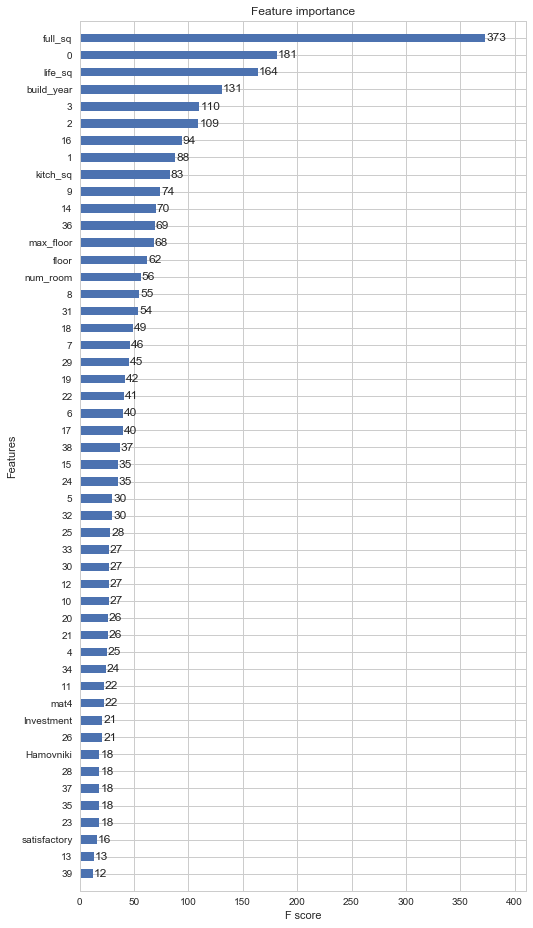

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model, max_num_features=50, height=0.5, ax=ax)


In [169]:
final_test.get_dtype_counts()
final_train.get_dtype_counts()

float64    47
int64       1
uint8      13
dtype: int64

In [164]:
ylog_pred = partial_model.predict(final_test)
#y_pred = np.exp(ylog_pred) - 1

#df_sub = pd.DataFrame({'id': test_merge["id"], 'price_doc': y_pred})

#df_sub.to_csv('sub.csv', index=False)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

In [170]:
macro_cols = ["balance_trade", "balance_trade_growth", "eurrub", "average_provision_of_build_contract",
"micex_rgbi_tr", "micex_cbi_tr", "deposits_rate", "mortgage_value", "mortgage_rate",
"income_per_cap", "rent_price_4+room_bus", "museum_visitis_per_100_cap", "apartment_build"]

In [311]:
df_train = pd.read_csv("train.csv", parse_dates=['timestamp'])
df_test = pd.read_csv("test.csv", parse_dates=['timestamp'])
df_macro = pd.read_csv("macro.csv", parse_dates=['timestamp'], usecols=['timestamp'] + macro_cols)

df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


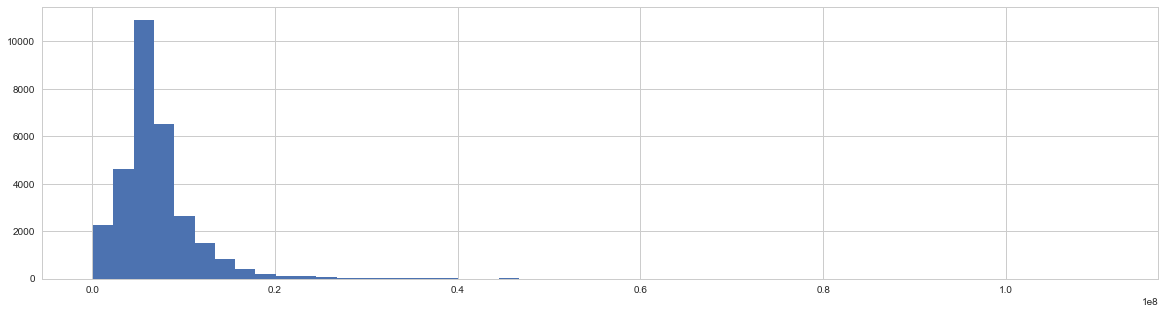

In [206]:
ax = df_train['price_doc'].hist(bins=50)


In [312]:
# ylog will be log(1+y), as suggested by https://github.com/dmlc/xgboost/issues/446#issuecomment-135555130
ylog_train_all = np.log1p(df_train['price_doc'].values)
id_test = df_test['id']

df_train.drop(['id', 'price_doc'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

# Build df_all = (df_train+df_test).join(df_macro)
num_train = len(df_train)
df_all = pd.concat([df_train, df_test])
#df_all = pd.merge_ordered(df_all, df_macro, on='timestamp', how='left')
print(df_all.shape)

nonsense_fullsq = []
fullsq_too_big = []
kitchen_too_big = []
kitchen_too_small = []
life_too_big = []
no_life = []
fullsq_lifesq_ratio = []
test = []
"""
for i in range(len(df_all)): 
    if df_all.iloc[i]["full_sq"] < 5:
        nonsense_fullsq.append(i)
    if df_all.iloc[i]["full_sq"] >500:
        fullsq_too_big.append(i)
    if df_all.iloc[i]["life_sq"] > df_all.iloc[i]["full_sq"] or\
    df_all.iloc[i]["life_sq"] > 500: 
        life_too_big.append(i)
    if df_all.iloc[i]["life_sq"] < 5:
        no_life.append(i)
    if df_all.iloc[i]["kitch_sq"] >= df_all.iloc[i]["full_sq"] or\
    (df_all.iloc[i]["kitch_sq"] >= df_all.iloc[i]["life_sq"] and df_all.iloc[i]["life_sq"] > 5):
        kitchen_too_big.append(i)
    if (df_all.iloc[i]["kitch_sq"] <= 1 and df_all.iloc[i]["full_sq"] <= 15) or\
    df_all.iloc[i]["kitch_sq"] < 2:
        kitchen_too_small.append(i)
    if df_all.iloc[i]["full_sq"] > 0 and df_all.iloc[i]["life_sq"] > 0:
        if df_all.iloc[i]["life_sq"]/df_all.iloc[i]["full_sq"] < 0.4:
            fullsq_lifesq_ratio.append(i)  
"""

(38133, 290)


'\nfor i in range(len(df_all)): \n    if df_all.iloc[i]["full_sq"] < 5:\n        nonsense_fullsq.append(i)\n    if df_all.iloc[i]["full_sq"] >500:\n        fullsq_too_big.append(i)\n    if df_all.iloc[i]["life_sq"] > df_all.iloc[i]["full_sq"] or    df_all.iloc[i]["life_sq"] > 500: \n        life_too_big.append(i)\n    if df_all.iloc[i]["life_sq"] < 5:\n        no_life.append(i)\n    if df_all.iloc[i]["kitch_sq"] >= df_all.iloc[i]["full_sq"] or    (df_all.iloc[i]["kitch_sq"] >= df_all.iloc[i]["life_sq"] and df_all.iloc[i]["life_sq"] > 5):\n        kitchen_too_big.append(i)\n    if (df_all.iloc[i]["kitch_sq"] <= 1 and df_all.iloc[i]["full_sq"] <= 15) or    df_all.iloc[i]["kitch_sq"] < 2:\n        kitchen_too_small.append(i)\n    if df_all.iloc[i]["full_sq"] > 0 and df_all.iloc[i]["life_sq"] > 0:\n        if df_all.iloc[i]["life_sq"]/df_all.iloc[i]["full_sq"] < 0.4:\n            fullsq_lifesq_ratio.append(i)  \n'

In [263]:
#deal with full_sq < 5 cases
for i in nonsense_fullsq:
    #if life_sq is a reasonable size it will replace full sq while being kept
    if df_all.loc[i, "life_sq"] > 20:
        df_all.loc[i, "full_sq"] = df_all.loc[i, "life_sq"]
    #if kitch_sq is a reasonable size it will replace full sq while being dismissed    
    elif df_all.loc[i, "kitch_sq"] > 20:
        df_all.loc[i, "full_sq"] = df_all.loc[i, "kitch_sq"]
        df_all.loc[i, "kitch_sq"] = np.NaN

#deal with full_sq > 500 cases
for i in fullsq_too_big:
    df_all.loc[i, "full_sq"] = np.NaN
            
#deal with kitchen too big cases
#ok looking through the values we can observe that there are some entries really large
#for instance row 10,368 got 2013. This is obviously an error 2013 looks much more like a building year
#So if the building year is a reasonable year set kitchen to NaN, otherwise replace building year before setting 
#kitchen to NaN
for i in kitchen_too_big:
    if df_all.loc[i, "kitch_sq"] > 1900:
        if df_all.loc[i, "build_year"] > 1900:
            df_all.loc[i, "kitch_sq"] = np.NaN
        else: 
            df_all.loc[i, "build_year"] = df_all.loc[i, "kitch_sq"]
            df_all.loc[i, "kitch_sq"] = np.NaN
    #in case the kitchen is as large or larger than full sq we will set the kitchen to NaN
    else:
        df_all.loc[i, "kitch_sq"] = np.NaN

#deal with kitchen too small cases
#so when we have a very small flat it might be reasonable to assume that a kitchenlette is about 1 m² otherwise 
#a kitchen should be larger than 1 m². If this is not the case all values will be set to NaN
for i in kitchen_too_small:
    df_all.loc[i, "kitch_sq"] = np.NaN
   
#no_life cases
#just set life to NaN
for i in no_life:
    df_all.loc[i, "life_sq"] = np.NaN
#life too big cases
#ok so if the life is just a little bit larger than full sq (+ 10 m²) we will swap both variables
#otherwise lets set them to NaN for now
for i in life_too_big:
    if df_all.loc[i, "full_sq"] > df_all.loc[i, "life_sq"]:
        pass
    elif (df_all.loc[i, "full_sq"] + 10) > df_all.loc[i, "life_sq"]:
        df_all.loc[i, "full_sq"], df_all.loc[i, "life_sq"] = \
        df_all.loc[i, "life_sq"], df_all.loc[i, "full_sq"]
    else:
        df_all.loc[i, "life_sq"] = np.NaN

#bad ratio
#lets for now just set life_sq to NaN
for i in fullsq_lifesq_ratio:
    df_all.loc[i, "life_sq"] = np.NaN

KeyError: 'the label [30935] is not in the [index]'

In [260]:
too_high = []
floors_swapped = []

too_old = []
too_young = []

no_rooms = []
too_small = []

for i in range(len(df_all)):
    if df_all.loc[i, "floor"] > 85:
        too_high.append(i)
    if df_all.loc[i, "max_floor"] > 85:
        too_high.append(i)
    if df_all.loc[i, "max_floor"] < df_all.loc[i, "floor"]:
        floors_swapped.append(i)
    
    if df_all.loc[i, "build_year"] < 1500:
        too_young.append(i)
    if df_all.loc[i, "build_year"] > 2020:
        too_old.append(i)
        
    if df_all.loc[i, "num_room"] == 0:
        no_rooms.append(i)
    if df_all.loc[i, "life_sq"] > 0 and df_all.loc[i, "num_room"] > 0:    
        if df_all.loc[i, "life_sq"]/df_all.loc[i, "num_room"] < 4:
            too_small.append(i)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [264]:
df_all.loc[too_high, ["max_floor"]] = np.NaN
df_all.loc[floors_swapped, ["max_floor"]] = np.NaN

#I will replace the values manually but otherwise one should replace them with NaN
#train_merge.loc[too_old, ["build_year"]] = np.NaN
df_all.loc[10089, "build_year"] = 2007
df_all.loc[15220, "build_year"] = 1965
df_all.loc[too_young, ["build_year"]] = np.NaN

df_all.loc[no_rooms, ["num_room"]] = np.NaN
df_all.loc[too_small, ["num_room"]] = np.NaN

In [265]:
x = (df_all["state"][df_all["state"] == 33].index[0])
df_all.loc[x, ["state"]] = 3

In [309]:
# Add month-year
month_year = (df_all.timestamp.dt.month + df_all.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
df_all['month'] = df_all.timestamp.dt.month
df_all['dow'] = df_all.timestamp.dt.dayofweek

# Other feature engineering
df_all['rel_floor'] = df_all['floor'] / df_all['max_floor'].astype(float)
df_all['rel_kitch_sq'] = df_all['kitch_sq'] / df_all['full_sq'].astype(float)

# Remove timestamp column (may overfit the model in train)
df_all.drop(['timestamp'], axis=1, inplace=True)

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


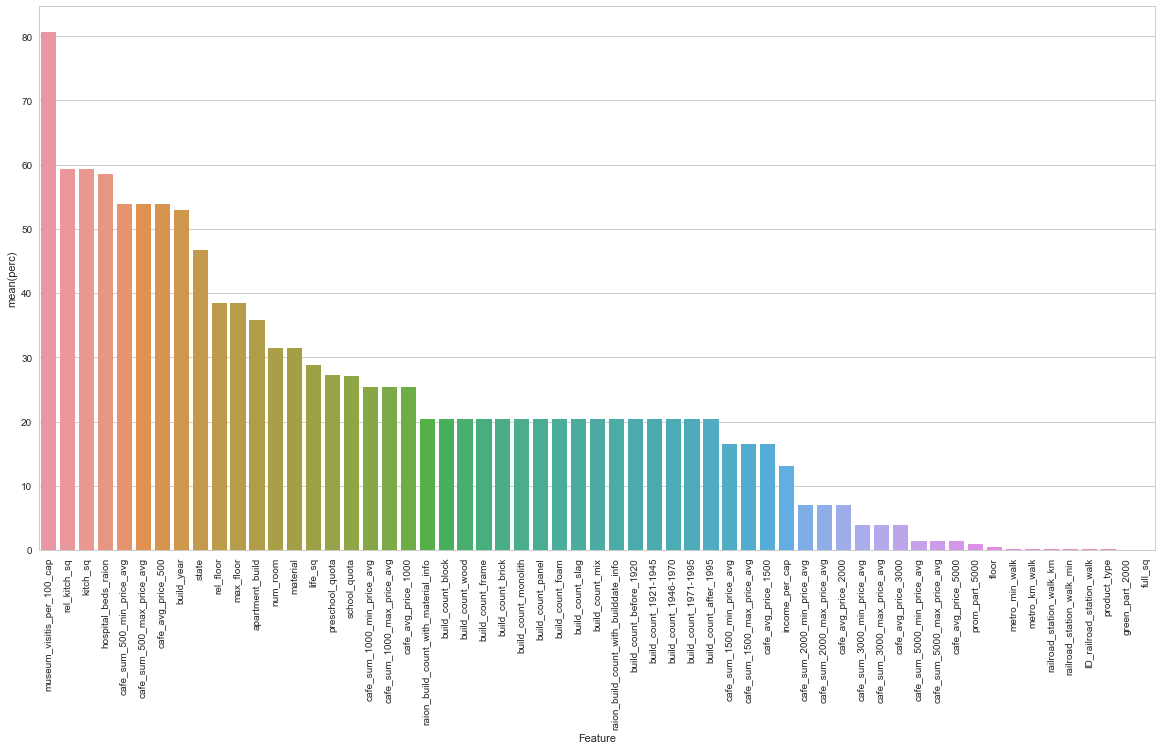

In [229]:
"""
m = df_all.isnull().sum()

train = zip(df_all.columns, m)
train = sorted(train, key = lambda x: x[1], reverse=True)
train = pd.DataFrame(train)
train.columns = ["Feature", "Missing"]
train = train[train["Missing"] > 0]
train["perc"] = train["Missing"]/len(train_merge)*100

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(train["Feature"], train["perc"])

train = train[train["perc"] > 20]
a = [i for i in train["Feature"]]
df_all.drop(a, axis=1, inplace=True)
"""

In [370]:
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.decomposition import PCA

df_numeric = df_all.select_dtypes(exclude=['object'])
df_numeric = df_numeric.fillna(0)
df_numeric.drop("timestamp", axis=1, inplace=True)
print(df_all.columns)
scaler = MinMaxScaler()
df_numeric = scaler.fit_transform(df_numeric)
df_numeric = normalize(df_numeric)
df_numeric = pd.DataFrame(df_numeric)

Index(['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000'],
      dtype='object', length=290)


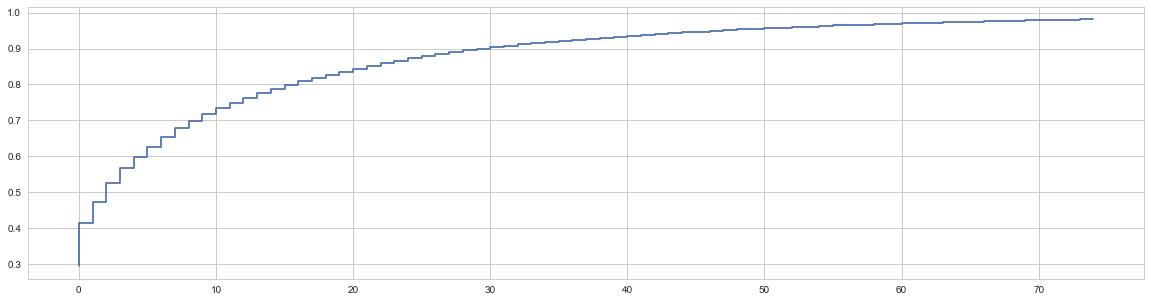

In [371]:
pca = PCA(n_components = 75)
pca.fit(df_numeric)
explained = pca.explained_variance_ratio_
plt.step(range(75), np.cumsum(explained))

In [372]:
df_pca = pca.transform(df_numeric)
df_pca = pd.DataFrame(df_pca[:,:60])
df_pca.shape

(38133, 60)

In [364]:
# Deal with categorical values
df_numeric = df_all.select_dtypes(exclude=['object'])
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

df_values = pd.concat([df_numeric, df_obj], axis=1)

In [373]:
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]
    
df_pca.reset_index(drop=True, inplace=True)
df_obj.reset_index(drop=True, inplace=True)    
    
df_values_pca = pd.concat([df_pca, df_obj], axis=1)

In [374]:
# Convert to numpy values
X_all = df_values_pca.values
print(X_all.shape)

# Create a validation set, with last 20% of data
num_val = int(num_train * 0.2)

X_train_all = X_all[:num_train]
X_train = X_all[:num_train-num_val]
X_val = X_all[num_train-num_val:num_train]
ylog_train = ylog_train_all[:-num_val]
ylog_val = ylog_train_all[-num_val:]

X_test = X_all[num_train:]

df_columns = df_values_pca.columns

print('X_train_all shape is', X_train_all.shape)
print('X_train shape is', X_train.shape)
print('y_train shape is', ylog_train.shape)
print('X_val shape is', X_val.shape)
print('y_val shape is', ylog_val.shape)
print('X_test shape is', X_test.shape)



(38133, 75)
X_train_all shape is (30471, 75)
X_train shape is (24377, 75)
y_train shape is (24377,)
X_val shape is (6094, 75)
y_val shape is (6094,)
X_test shape is (7662, 75)


In [377]:
x = []
for i in range(60):
    x.append("PC{}".format(i+1))

y = (['product_type',                  'sub_area',
          'culture_objects_top_25', 'thermal_power_plant_raion',
              'incineration_raion',       'oil_chemistry_raion',
                 'radiation_raion',   'railroad_terminal_raion',
                'big_market_raion',     'nuclear_reactor_raion',
        'detention_facility_raion',               'water_1line',
                 'big_road1_1line',            'railroad_1line',
                         'ecology']) 
for i in y:
    x.append(i)
print(len(x))
df_values_pca.columns = x
df_columns = df_values_pca.columns


dtrain_all = xgb.DMatrix(X_train_all, ylog_train_all, feature_names=df_columns)
dtrain = xgb.DMatrix(X_train, ylog_train, feature_names=df_columns)
dval = xgb.DMatrix(X_val, ylog_val, feature_names=df_columns)
dtest = xgb.DMatrix(X_test, feature_names=df_columns)



75


In [378]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

num_boost_round = partial_model.best_iteration

[0]	val-rmse:14.478
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:5.30886
[40]	val-rmse:2.04041
[60]	val-rmse:0.933419
[80]	val-rmse:0.61457
[100]	val-rmse:0.536204
[120]	val-rmse:0.515015
[140]	val-rmse:0.507857
[160]	val-rmse:0.505325
[180]	val-rmse:0.50399
[200]	val-rmse:0.502558
[220]	val-rmse:0.501931
[240]	val-rmse:0.501046
[260]	val-rmse:0.500909
[280]	val-rmse:0.500393
[300]	val-rmse:0.500169
[320]	val-rmse:0.499889
[340]	val-rmse:0.49948
[360]	val-rmse:0.499017
[380]	val-rmse:0.49899
[400]	val-rmse:0.49873
Stopping. Best iteration:
[393]	val-rmse:0.498629



In [361]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight' : 6,
    'gamma' : 0.2,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=75, verbose_eval=20)

num_boost_round = partial_model.best_iteration

[0]	val-rmse:14.4779
Will train until val-rmse hasn't improved in 75 rounds.
[20]	val-rmse:5.3066
[40]	val-rmse:2.04011
[60]	val-rmse:0.932895
[80]	val-rmse:0.615875
[100]	val-rmse:0.539639
[120]	val-rmse:0.520054
[140]	val-rmse:0.514543
[160]	val-rmse:0.511202
[180]	val-rmse:0.509554
[200]	val-rmse:0.508619
[220]	val-rmse:0.50808
[240]	val-rmse:0.507379
[260]	val-rmse:0.506889
[280]	val-rmse:0.506336
[300]	val-rmse:0.506156
[320]	val-rmse:0.505733
[340]	val-rmse:0.505542
[360]	val-rmse:0.505548
[380]	val-rmse:0.504855
[400]	val-rmse:0.504684
[420]	val-rmse:0.504743
[440]	val-rmse:0.504565
[460]	val-rmse:0.504325
[480]	val-rmse:0.504227
[500]	val-rmse:0.504108
[520]	val-rmse:0.503917
[540]	val-rmse:0.503769
[560]	val-rmse:0.504251
[580]	val-rmse:0.504064
[600]	val-rmse:0.504089
Stopping. Best iteration:
[528]	val-rmse:0.50365



In [362]:
xgb_params = {'learning_rate' :0.1,
 'n_estimators':1000,
 'max_depth':4,
 'min_child_weight':6,
 'gamma':0,
 'subsample':0.8,
 'colsample_bytree':0.8,
 'reg_alpha':0.005,
 'objective': 'reg:linear',
 'nthread':4,
 'scale_pos_weight':1,
              'silent' : 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=75, verbose_eval=20)

num_boost_round = partial_model.best_iteration

[0]	val-rmse:13.7248
Will train until val-rmse hasn't improved in 75 rounds.
[20]	val-rmse:1.85728
[40]	val-rmse:0.600885
[60]	val-rmse:0.524322
[80]	val-rmse:0.516259
[100]	val-rmse:0.513459
[120]	val-rmse:0.512766
[140]	val-rmse:0.51196
[160]	val-rmse:0.511006
[180]	val-rmse:0.510274
[200]	val-rmse:0.509512
[220]	val-rmse:0.509186
[240]	val-rmse:0.50919
[260]	val-rmse:0.50881
[280]	val-rmse:0.508157
[300]	val-rmse:0.507945
[320]	val-rmse:0.507341
[340]	val-rmse:0.507328
[360]	val-rmse:0.507787
[380]	val-rmse:0.507497
[400]	val-rmse:0.507439
Stopping. Best iteration:
[342]	val-rmse:0.50713



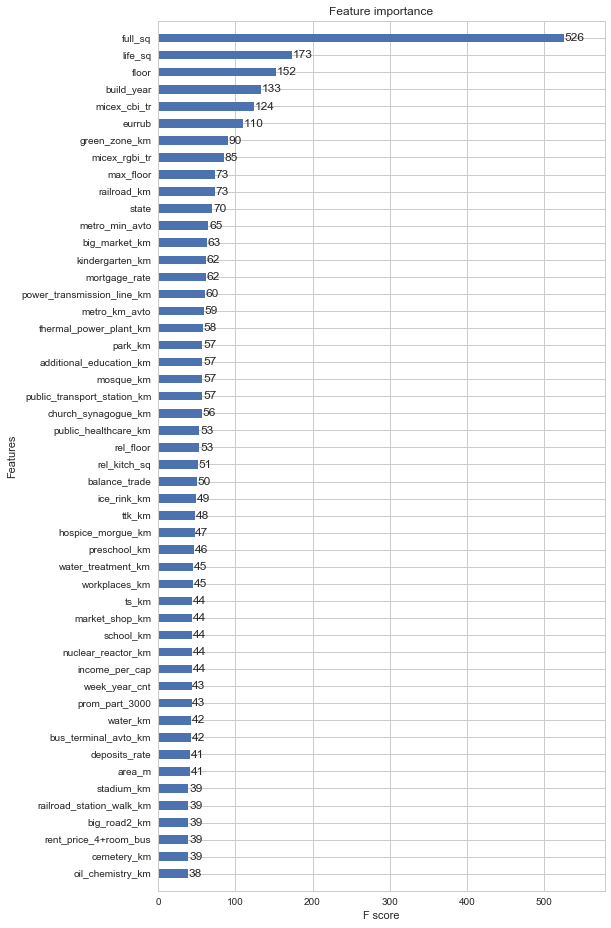

In [179]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model, max_num_features=50, height=0.5, ax=ax)

In [249]:
num_boost_round = partial_model.best_iteration

In [250]:
model = xgb.train(dict(xgb_params, silent=0), dtrain_all, num_boost_round=num_boost_round)

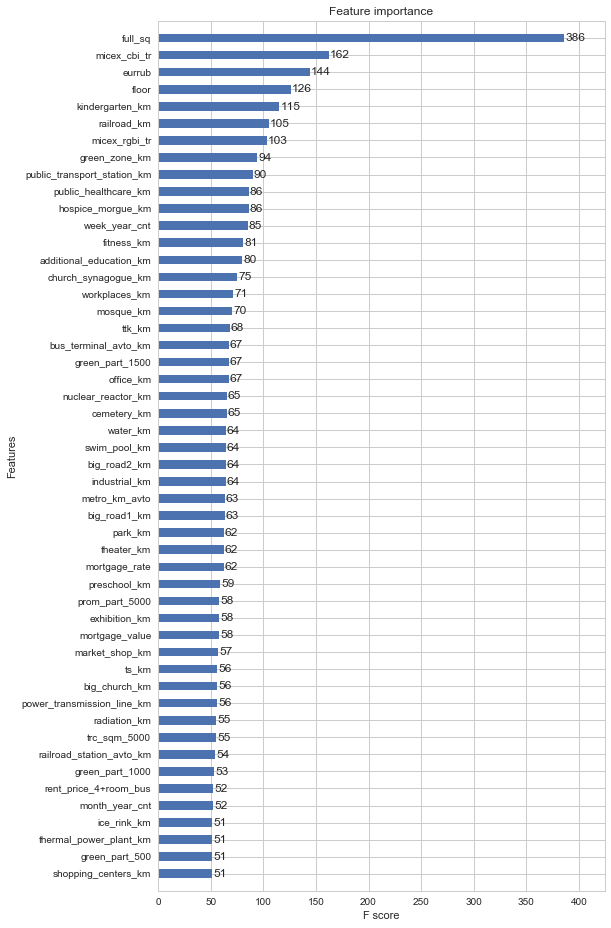

In [251]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [252]:
ylog_pred = model.predict(dtest)
y_pred = np.exp(ylog_pred) - 1

df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

df_sub.to_csv('submission.csv', index=False)